# Titanic: Machine Learning from Disaster
## INTRODUCTION

In [1]:
#importing the common libraries we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#since we will be making quite a few plots, it is aways good to pre-set a theme
sns.set(style = 'darkgrid')

#importing statistics and machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
#Note: we already have testing and training data from Kaggle so there is no 
#need for train_test_split
import string
import warnings
warnings.filterwarnings('ignore')
SEED = 42

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Insights about Training and Testing set:
- Training set has 891 rows and Testing set has 418 rows
- Training set has 12 features and Testing set has 11 features.
- One extra feature in the Training set is 'Survived' feature, which is the target variable.

In [4]:
def concat_df(train_data, test_data):
    #returns a concatenated dataset of training and testing sets
    return pd.concat([train_data, test_data], sort = True).reset_index(drop = True)

def divide_df(all_data):
    #returns divided dfs of training and testing sets
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis = 1)

df_all = concat_df(df_train, df_test)
dfs = [df_train, df_test]

df_train.name = 'Training Set'
df_test.name = 'Testing Set'
df_all.name = 'All Set'

print('Number of Training Observations = {}'.format(df_train.shape[0]))
print('Number of Testing Observations = {}\n'.format(df_test.shape[0]))
print('Training X shape = {}'.format(df_train.shape))
print('Training y shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X shape = {}'.format(df_test.shape))
print('Test y shape = {}\n'.format(df_test.shape[0]))
print('Training set Features: \n', df_train.columns)
print('Testing set Features: \n', df_test.columns)

Number of Training Observations = 891
Number of Testing Observations = 418

Training X shape = (891, 12)
Training y shape = 891

Test X shape = (418, 11)
Test y shape = 418

Training set Features: 
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Testing set Features: 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## EXPLORATORY DATA ANALYSIS (EDA)
### Feature Explanations:
- 'PassengerId' is the unique id of the row and it has no effect on the target variable.
- 'Survived' is the target variable we are trying to predict for the testing set.

      - 1 = Survived
      - 0 = Not Survived
- 'Pclass' (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3)

      - 1 = Upper Class
      - 2 = Middle Class
      - 3 = Lower Class
- Features: 'Name', 'Sex' and 'Age' are self-explanatory.
- 'SibSp' is the total number of the passengers' siblings and spouse.
- 'Parch' is the total number of the passengers' parents and children
- 'Ticket' is the ticket number of the passenger
- 'Fare' is the passenger fare
- 'Cabin' is the cabin number of the passenger
- 'Embarked' is the port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S)

      - C = Cherbourg
      - Q = Queenstown
      - S = Southampton

In [5]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,D48,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
646,647,0,3,"Cor, Mr. Liudevit",male,19.00,0,0,349231,7.8958,NaN,S


In [6]:
print(df_test.info())
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
382,1274,3,"Risien, Mrs. Samuel (Emma)",female,NaN,0,0,364498,14.5000,NaN,S
270,1162,1,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C
245,1137,1,"Kenyon, Mr. Frederick R",male,41.0,1,0,17464,51.8625,D21,S


In [7]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Testing Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




### Missing Values:
As seen above, some columns have missing values. 
display_missing function shows the count of missing values in each column in both training and testing sets.
- Training set has missing values in Age, Cabin and Embarked columns
- Testing set has missing values in Age, Cabin and Fare columns

It is convenient to work on concatenated training and test set while dealing with missing values, otherwise filled data may overfit to training or test set samples. The count of missing values in Age, Fare and Embarked are smaller compared to total sample, but roughly 80% of the Cabin is missing. Missing values in Age, Fare, Embarked can be filled using descriptive statistical measures but that wouldn't work for Cabin.

### Age

In [8]:
#we are using the concatenated testing and training dataset
df_all_corr = df_all.corr(numeric_only = True).abs().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()
df_all_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'}, inplace = True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
0,Age,Age,1.000000
9,Age,Pclass,0.408106
18,Age,SibSp,0.243699
21,Age,Fare,0.178740
26,Age,Parch,0.150917
30,Age,Survived,0.077221
41,Age,PassengerId,0.028814


### Insights:
Missing values in age can be filled with median values of the column, but using the median age of the whole data set is not a good choice. Median Age of Pclass groups is the best choice because of its highest correlation with Age **(0.408106)**. It is therefore more logical to group ages by passenger classes instead of other features.

In order to be more accurate, **Sex** feature is used as the second level of groupby while filling the missing values of Age. As seen below, Pclass and Sex groups have distinct median Age values. When passenger class increases, the median age for both males and females also increases. However, females tend to have slightly lower median Age than males. The median Ages below are used for filling the missing values in Age feature.

In [9]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass'])['Age'].median()
for pclass in range(1,4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

print('Median age of all passengers: {}'.format(df_all['Age'].median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [10]:
#Filling the missing values in Age with the medians of Sex and Pclass groups
n = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
df_all['Age'] = n.droplevel(level = [0,1])

In [11]:
age_by_pclass_sex

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [12]:
df_all.loc[df_all['PassengerId'] == 1257]
#filled.

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1256,22.0,NaN,S,69.55,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343


### Embarked

In [13]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [14]:
df_all.groupby(['Sex', 'Pclass', 'Embarked'])['Name'].count()['female'][1]

Embarked
C    71
Q     2
S    69
Name: Name, dtype: int64

### Insight:
Embarked is a categorical feature and there are only 2 missing values in the whole data set. Both of these are female, Pclass 1 and have the same ticket and Cabin number. This means that they know each other and embarked from the same port together. The mode Embarked value for an upper class female passenger is C(Cherbourg), but this doesn't guarantee they embarke from this port.
Doing a little gogle search on Stone, Mrs. Georse Nelson (Martha Evelyn), we can see that she embarked from **S(Southampton)** with her maid Amelia Icard.
Therefore, missing values in Embarked are filled with S using this information.


In [15]:
#filling missing values in Embarked with S
df_all['Embarked'].fillna('S', inplace = True)

### Fare

In [16]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


### Insights:
There is only one passenger with missing Fare. We can assume that Fare is related to family size(Parch and SibSp), Embarked and Pclass features. Median Fare value of a male embarked from S with no family and Pclass 3 is a logical choice to fill the missing value.


In [17]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp', 'Embarked']).Fare.median()[3][0][0]['S']
#Filling the missing vaue in Fare
df_all['Fare'].fillna(med_fare, inplace = True)

### Cabin
Cabin feature is little bit tricky and it needs further exploration. The large portion of the Cabin feature is missing and the feature itself can't be ignored completely because some the cabins might have higher survival rates. It turns out to be the first letter of the Cabin values are the decks in which the cabins are located. Those decks were mainly separated for one passenger class, but some of them were used by multiple passenger classes.
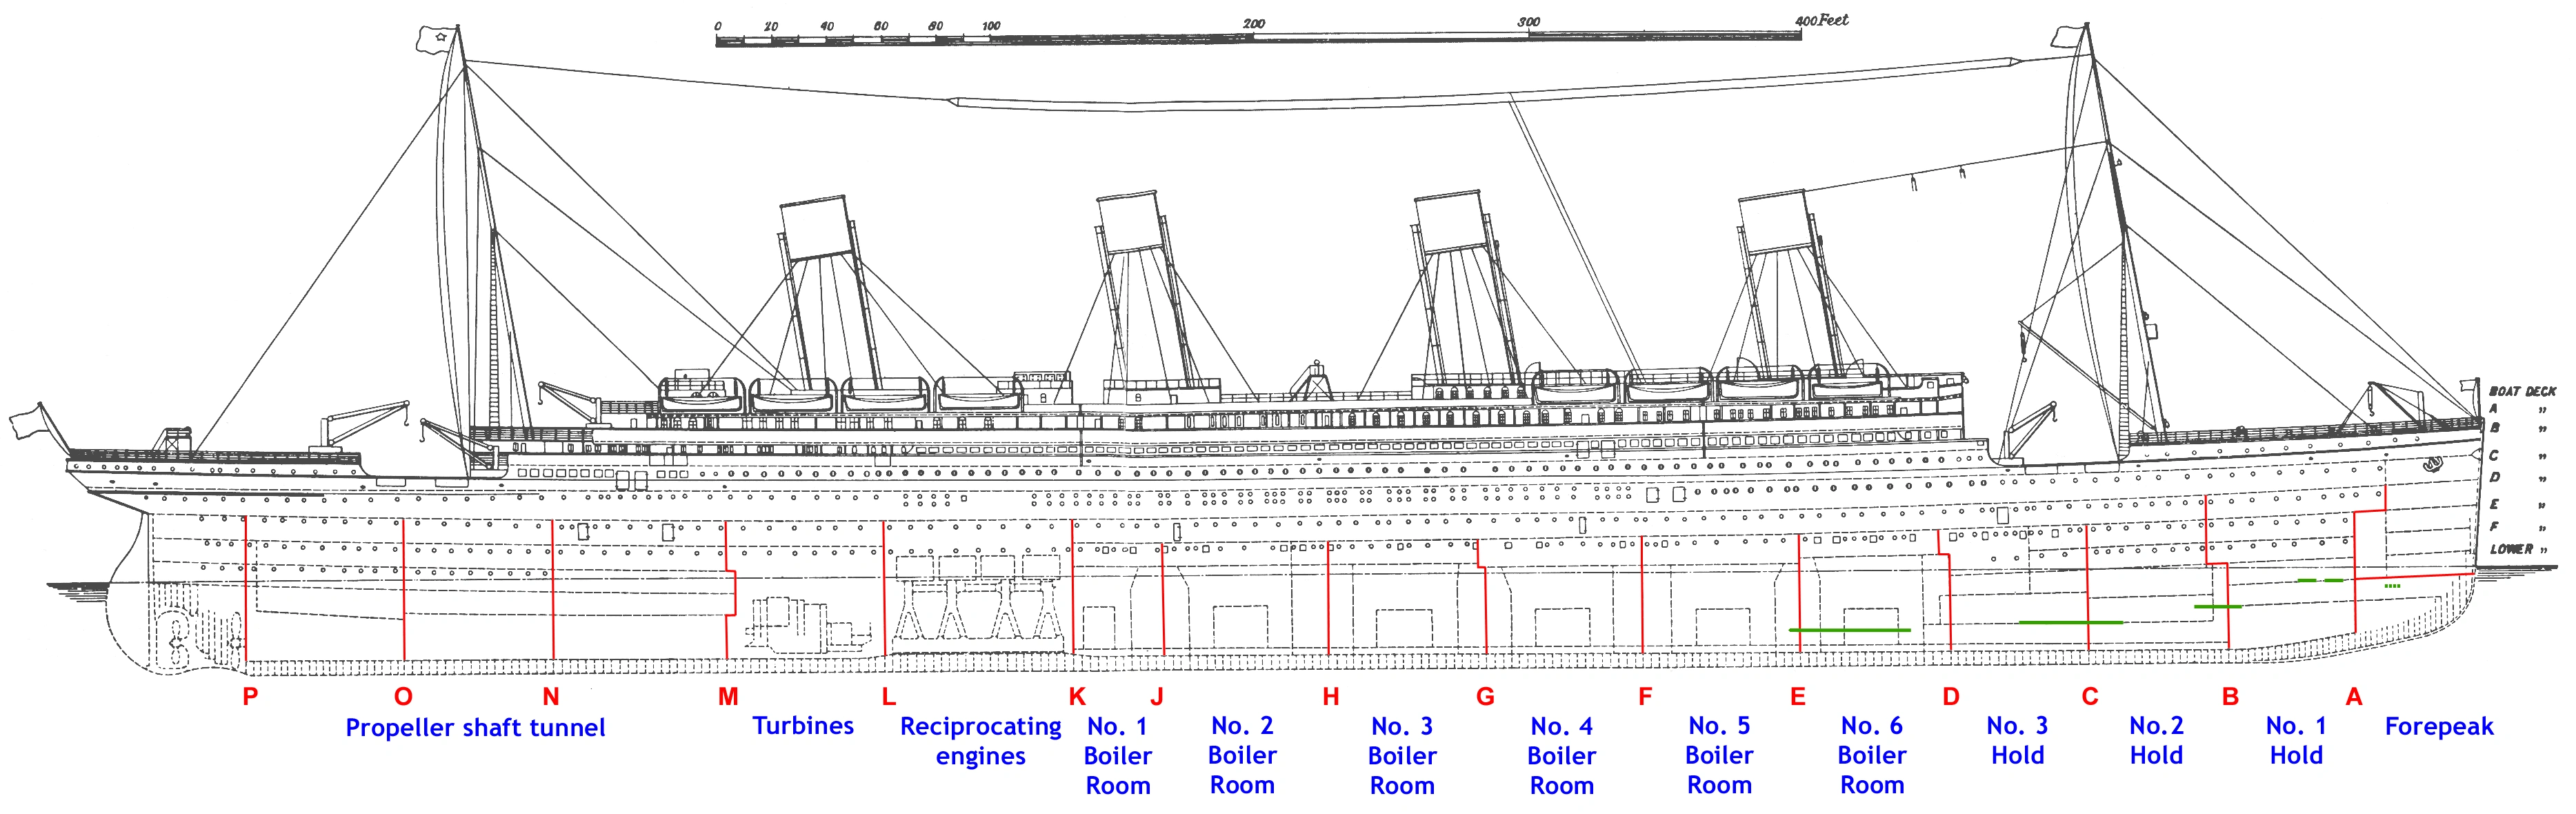
- From going A to G, distance to the staircase increases which might be a factor of survival.

In [18]:
#Creating Deck column from the first letter of the Cabin column 
#(M stands for missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

#removing the rest of the columns except Name to count. Transposing it to make 
#leveled headings. Level 1 is deck A-G, T and M, level 2 is Pclass
df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns = 
               ['Survived', 'PassengerId', 'Parch', 'SibSp', 'Fare', 'Age', 
                'Embarked', 'Sex', 'Ticket', 'Cabin']).rename(columns = 
                                          {'Name': 'Count'}).transpose()
df_all_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

Deck-Pclass Percentages 
             0          1           2
A  100.000000   0.000000    0.000000
B  100.000000   0.000000    0.000000
C  100.000000   0.000000    0.000000
D   86.956522  13.043478    0.000000
E   82.926829   9.756098    7.317073
F    0.000000  61.904762   38.095238
G    0.000000   0.000000  100.000000
M    6.607495  25.049310   68.343195
T  100.000000   0.000000    0.000000


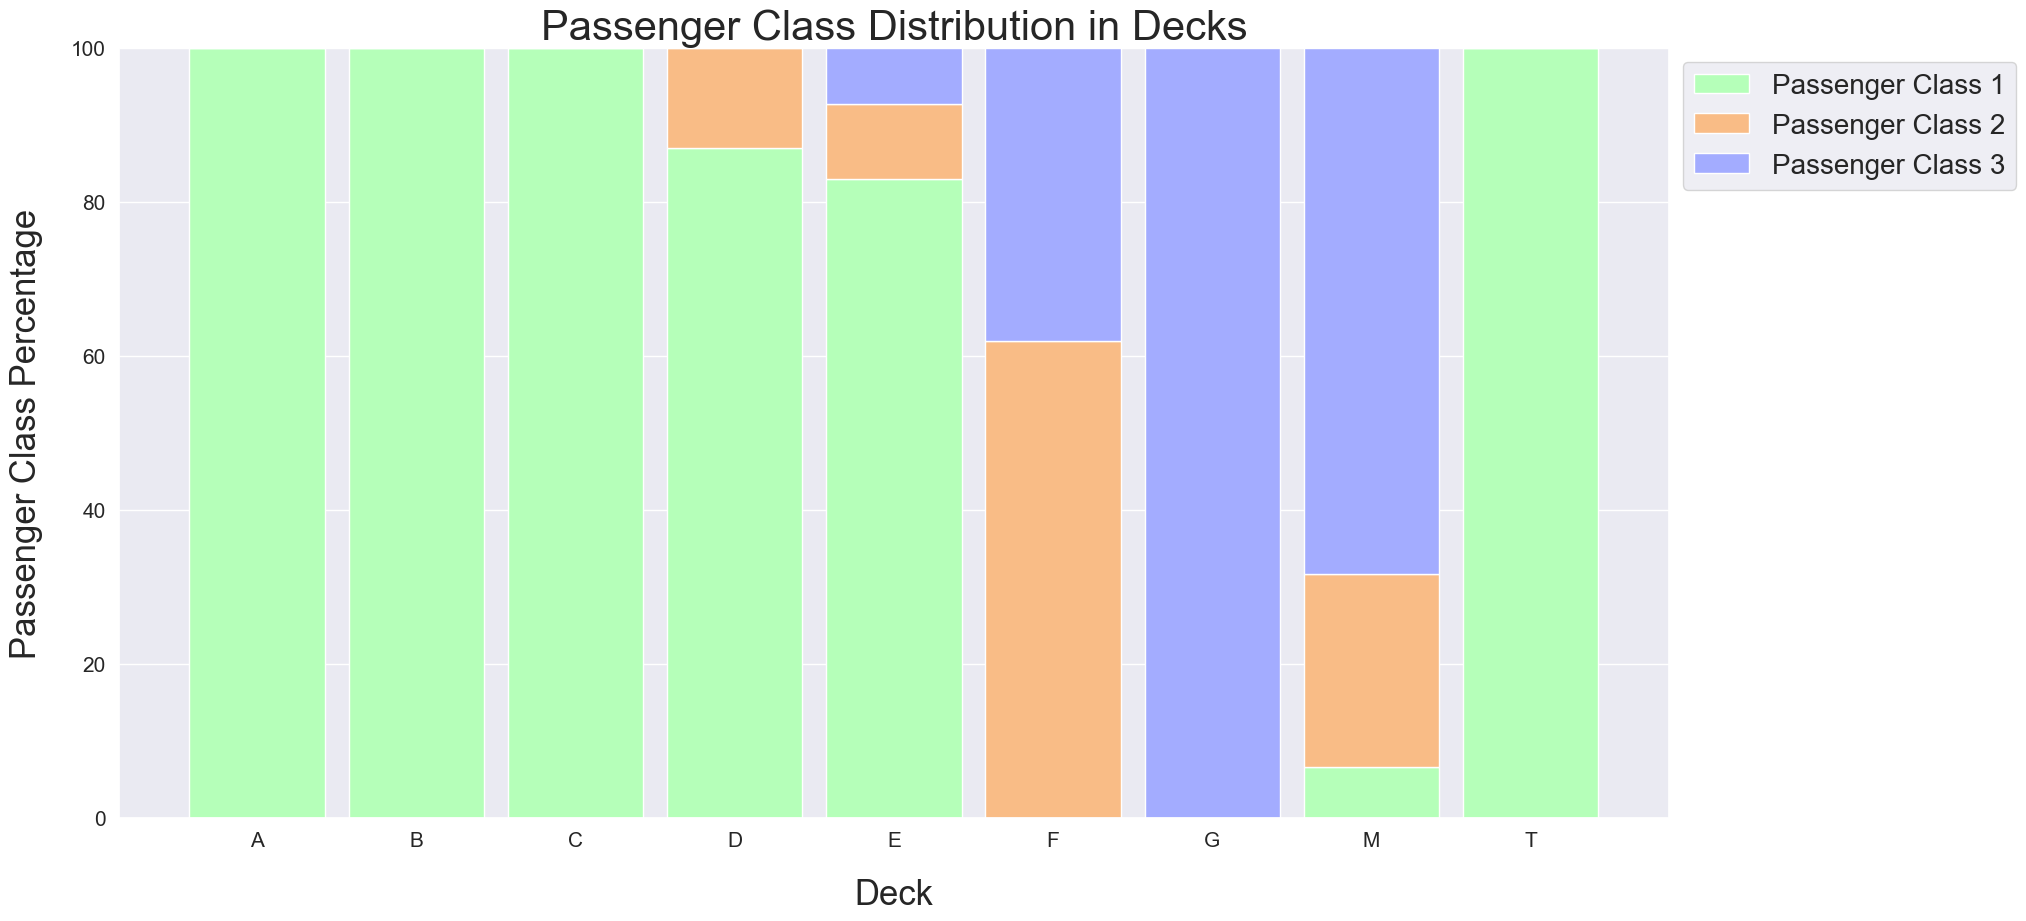

In [19]:
def get_pclass_dist(df):
    
    #Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]
    
    for deck in decks:
        for pclass in range(1,4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0
    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}
    
    #Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count/ df_decks[col].sum()) * 100 for count in df_decks[col]]
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    df_percentages = pd.DataFrame(percentages).transpose()
    print('Deck-Pclass Percentages \n', df_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize = (20,10))
    plt.bar(bar_count, pclass1, color = '#b5ffb9', edgecolor = 'white', 
            width = bar_width, label = 'Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom = pclass1, color = '#f9bc86', 
            edgecolor = 'white', width = bar_width, label = 'Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom = pclass1 + pclass2, color = '#a3acff', 
            edgecolor = 'white', width = bar_width, label = 'Passenger Class 3')
    
    
    plt.xlabel('Deck', size = 25, labelpad = 20)
    plt.ylabel('Passenger Class Percentage', size = 25, labelpad = 20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1), prop = {'size': 20})
    plt.title('Passenger Class Distribution in Decks', size =30, y= 1.0)
    plt.show()

all_deck_counts, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

### Insights:
- On the Boat Deck there were 6 rooms labeled as T, U, W, X, Y, Z but only the T cabin is present in the dataset
- A, B and C decks were only for 1st class passengers
- D and E decks were for all classes
- F and G decks were for both 2nd and 3rd class passengers

### From graph:
- 100% of A, B and C decks are 1st class passengers.
- Deck D has almost 87% 1st class and 13% 2nd class passengers.
- Deck E has almost 83% 1st class, 10% 2nd class and 7% 3rd class passengers.
- Deck F has 62% 2nd class and 38% 3rd class passengers.
- 100% of Deck G is 3rd class passengers.
- There is only one passenger on Deck T and is a 1st class passenger. T cabin passenger has closest resemblance to A deck passenger so he is grouped with A deck.
- Passengers labeled as M are the missing values in Cabin feature. I don't think it's possible to find those passengers' real deck so we will use M like a deck.

In [20]:
#Passenger in T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

Deck-Survival Percentages 
            0          1
A  56.250000  43.750000
B  25.531915  74.468085
C  40.677966  59.322034
D  24.242424  75.757576
E  25.000000  75.000000
F  38.461538  61.538462
G  50.000000  50.000000
M  70.014556  29.985444


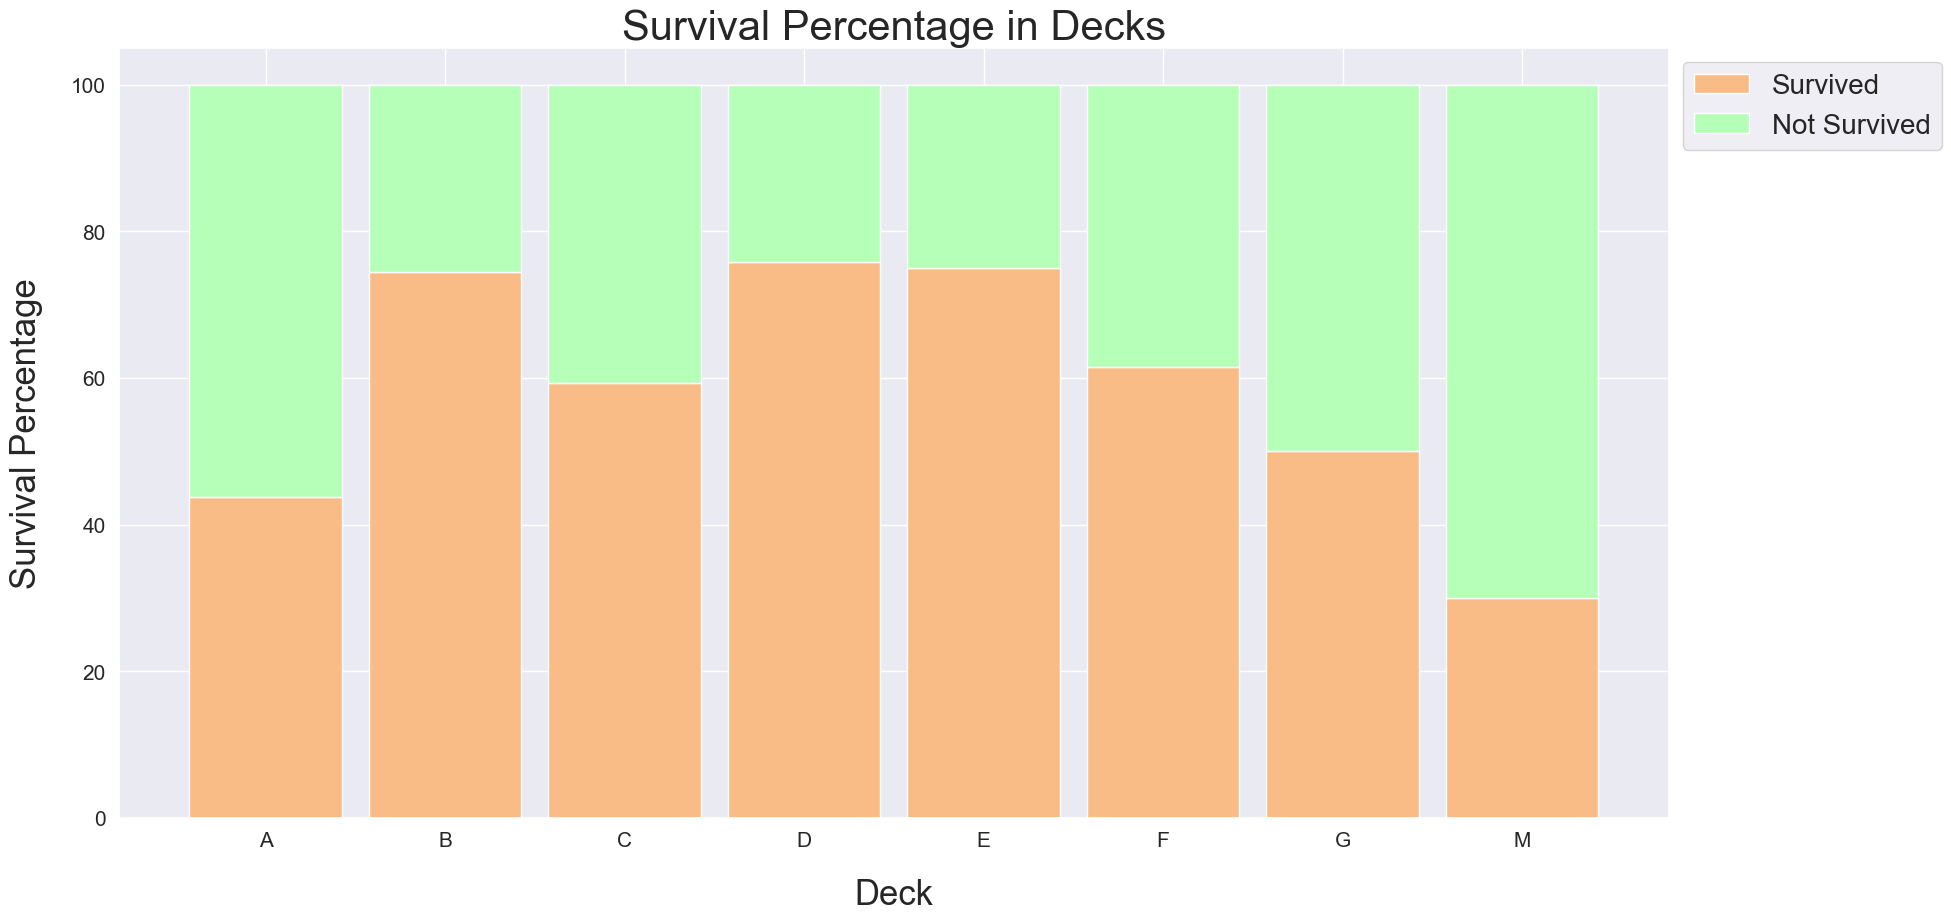

In [21]:
df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns = ['Pclass', 'PassengerId', 'Parch', 'SibSp', 'Fare', 'Age', 'Embarked', 'Sex', 'Ticket', 'Cabin']).rename(columns = {'Name': 'Count'}).transpose()
def get_survived_dist(df):
    
    #Creating a dictionary for every survival count in every deck
    surv_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}}
    decks  = df.columns.levels[0]
    
    for deck in decks:
        for survive in range(0,2):
            surv_counts[deck][survive] = df[deck][survive][0]
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}
    
    for col in df_surv.columns:
        surv_percentages[col] = [(count/ df_surv[col].sum())* 100 for count in df_surv[col]]
    
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    print('Deck-Survival Percentages \n', df_survived_percentages)
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85
    
    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize = (20,10))
    plt.bar(bar_count, survived, color = '#f9bc86', 
            edgecolor = 'white', width = bar_width, label = 'Survived')
    plt.bar(bar_count, not_survived, bottom = survived, color = '#b5ffb9',
            edgecolor = 'white', width = bar_width, label = 'Not Survived')
    
    plt.xlabel('Deck', size = 25, labelpad = 20)
    plt.ylabel('Survival Percentage', size = 25, labelpad = 20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis = 'x', labelsize = 15)
    plt.tick_params(axis = 'y', labelsize = 15)
    
    plt.legend(loc = 'upper left', bbox_to_anchor = (1,1), prop ={'size': 20})
    plt.title('Survival Percentage in Decks', size = 30, y = 1.0)
    plt.show()
    
all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

### Insights:
As suspected, every deck has different survival rates and that information can't be discarded. **Deck B, D and E have highest survival rates.**
Those decks are mostly occupied by 1st class passengers. **Deck M** has the lowest survival percentage which is mostly occupied by 2nd and 3rd class passengers. To conclude, **cabins used by 1st class passengers have higher survival rates than cabins used by 2nd and 3rd class passengers.** In my opinion M (Missing Cabin values) has the lowest survival rate because they couldn't retrieve the cabin data of the victims. That's why I believe labeling that group as M is a reasonable way to handle the missing data. It is a unique group with shared characteristics. Deck feature has high-cardinality right now so some of the values are grouped with each other based on their similarities in the following step.

- A, B and C decks are labeled as ABC because all of them have only 1st class passengers
- D and E decks are labeled as DE because both of them have similar passenger class distribution and same survival rate
- F and G decks are labeled as FG because of the same reason above
- M deck doesn't need to be grouped with other decks because it is very different from others and has the lowest survival rate.

In [22]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')
df_all['Deck'].value_counts()

Deck
M      1014
ABC     182
DE       87
FG       26
Name: count, dtype: int64

**After filling the missing values in Age, Embarked, Fare and Deck features, there is no missing value left in both training and testing set. Cabin is dropped because Deck feature is used instead of it.**

In [23]:
#Dropping the Cabin feature
df_all.drop(['Cabin'], inplace = True, axis = 1)

#splitting the entire dataset into training and testing sets
df_train, df_test = divide_df(df_all)
df_train.name = 'Training Set'
df_test.name = 'Testing Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

#checking for null values once again
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


Testing Set
Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0




## Target Distribution

342 of 891 passengers survived and it is the  38.38% of the training set.
549 of 891 passengers did not survive and it is the  61.62% of the training set.


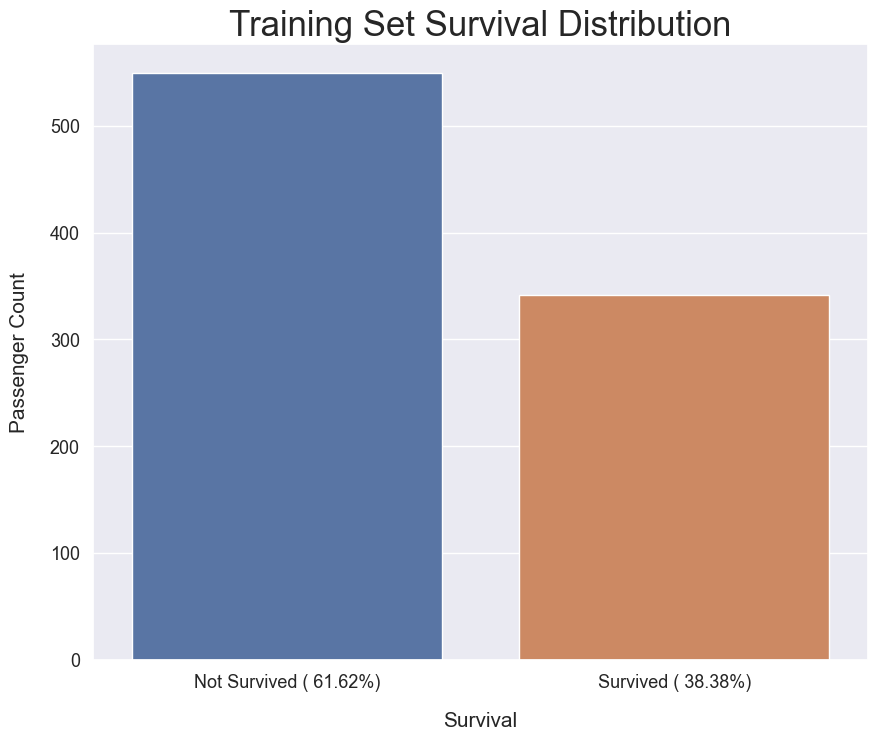

In [24]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

print('{} of {} passengers survived and it is the {: 0.2f}% of the training set.'.format(survived, df_train.shape[0], survived_per))
print('{} of {} passengers did not survive and it is the {: 0.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_per))

plt.figure(figsize = (10,8))
sns.countplot(x = df_train['Survived'])
plt.xlabel('Survival', size = 15, labelpad = 15)
plt.ylabel('Passenger Count', size = 15, labelpad = 15)
plt.xticks((0,1), ['Not Survived ({0: .2f}%)'.format(not_survived_per), 'Survived ({0: .2f}%)'.format(survived_per)])
plt.tick_params(axis = 'x', labelsize = 13)
plt.tick_params(axis = 'y', labelsize = 13)

plt.title('Training Set Survival Distribution', size = 25, y = 1.0)
plt.show()

### Insights:
- **38.38% (342/891)** of training set is **Class 1**
- **62.62% (549/891)** of training set is **Class 0**

## Correlations
- We observe highest correlation between Fare and Pclass in both traning set(-0.549500) and testing set(-0.577488).

In [25]:
df_train.corr(numeric_only = True)

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.124061,-0.176733,0.038742,-0.417667,-0.249747,-0.058635
Fare,0.124061,1.000000,0.216225,0.012658,-0.549500,0.159651,0.257307
Parch,-0.176733,0.216225,1.000000,-0.001652,0.018443,0.414838,0.081629
PassengerId,0.038742,0.012658,-0.001652,1.000000,-0.035144,-0.057527,-0.005007
Pclass,-0.417667,-0.549500,0.018443,-0.035144,1.000000,0.083081,-0.338481
SibSp,-0.249747,0.159651,0.414838,-0.057527,0.083081,1.000000,-0.035322
Survived,-0.058635,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


In [26]:
df_test.corr(numeric_only = True)

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Age,1.000000,0.345352,-0.059993,-0.041635,-0.526789,-0.082493
Fare,0.345352,1.000000,0.230409,0.008764,-0.577488,0.172031
Parch,-0.059993,0.230409,1.000000,0.043080,0.018721,0.306895
PassengerId,-0.041635,0.008764,0.043080,1.000000,-0.026751,0.003818
Pclass,-0.526789,-0.577488,0.018721,-0.026751,1.000000,0.001087
SibSp,-0.082493,0.172031,0.306895,0.003818,0.001087,1.000000


In [27]:
df_train_corr = df_train.drop(['PassengerId'], axis = 1).corr(numeric_only = True).abs().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()
df_train_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'}, inplace = True)
#df_train_corr
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace = True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

df_test_corr = df_test.drop(['PassengerId'], axis = 1).corr(numeric_only = True).abs().unstack().sort_values(kind = 'quicksort', ascending = False).reset_index()
df_test_corr.rename(columns = {'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation Coefficient'}, inplace = True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace = True)
#df_test_corr
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [28]:
#Training set high correlations
corr = df_train_corr_nd['Correlation Coefficient']> 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.549500
8,Age,Pclass,0.417667
10,Parch,SibSp,0.414838
12,Pclass,Survived,0.338481
14,Fare,Survived,0.257307
16,Age,SibSp,0.249747
18,Parch,Fare,0.216225
20,Parch,Age,0.176733
22,SibSp,Fare,0.159651
24,Age,Fare,0.124061


In [29]:
#Testing set high correlations
corr = df_test_corr_nd['Correlation Coefficient']> 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.577488
8,Pclass,Age,0.526789
10,Fare,Age,0.345352
12,Parch,SibSp,0.306895
14,Fare,Parch,0.230409
16,SibSp,Fare,0.172031


### Insights:
- There are 9 correlations in training set and 6 correlations in test set that are higher than 0.1.

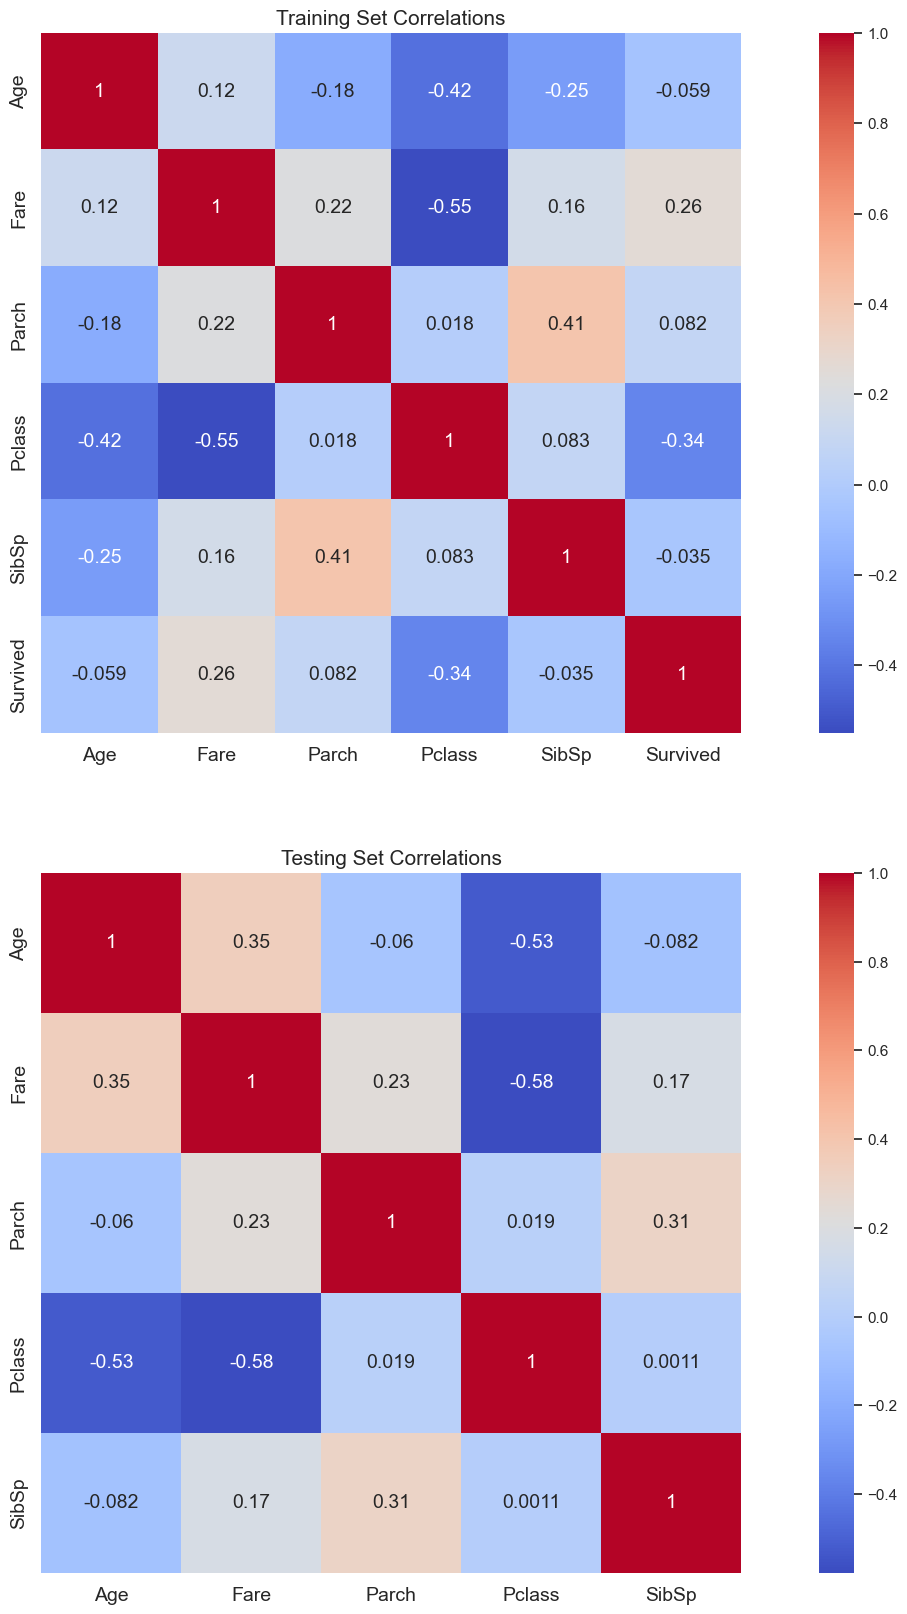

In [30]:
fig, axs = plt.subplots(nrows = 2, figsize = (20,20))
sns.heatmap(df_train.drop(['PassengerId'], axis = 1).corr(numeric_only = True), ax= axs[0], annot = True, square = True, cmap = 'coolwarm', annot_kws = {'size': 14})
sns.heatmap(df_test.drop(['PassengerId'], axis = 1).corr(numeric_only = True), ax= axs[1], annot = True, square = True, cmap = 'coolwarm', annot_kws = {'size': 14})

for i in range(2):
    axs[i].tick_params(axis = 'x', labelsize = 14)
    axs[i].tick_params(axis = 'y', labelsize = 14)
    
axs[0].set_title('Training Set Correlations', size = 15)
axs[1].set_title('Testing Set Correlations', size = 15)
plt.show()

## Target Distribution in Features:
### Continuous Features


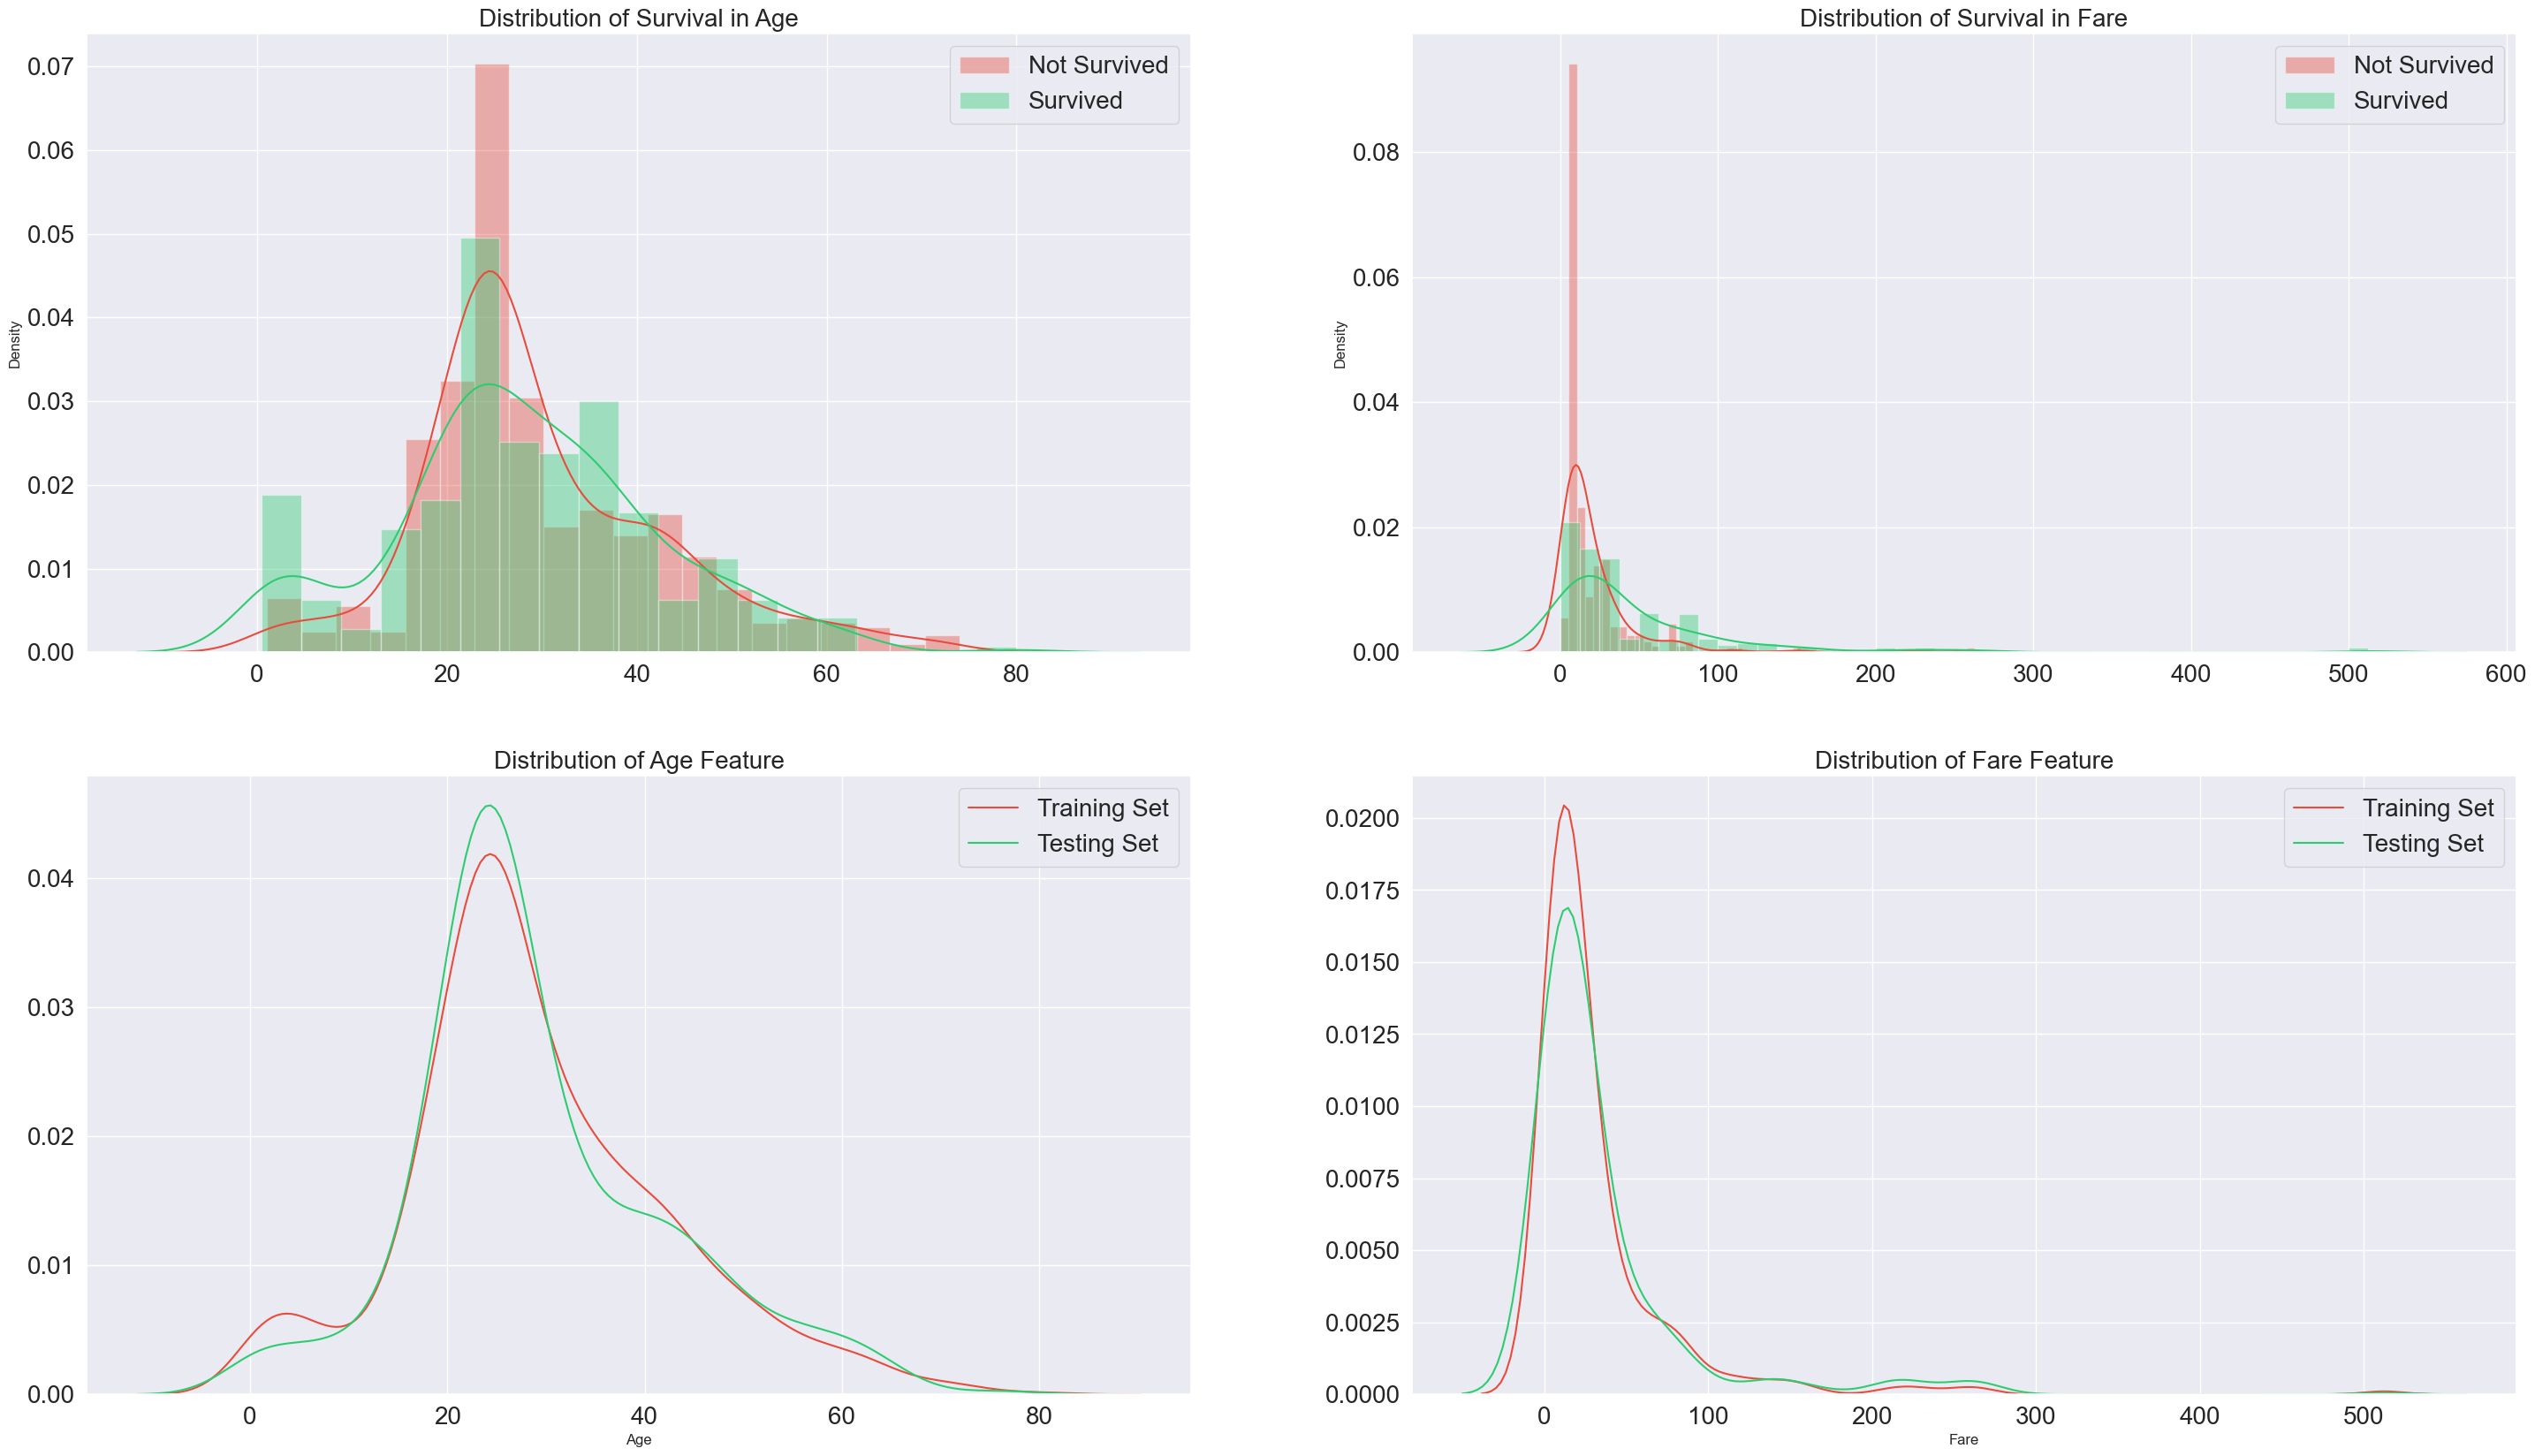

In [31]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1
fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (20,20))
plt.subplots_adjust(right = 1.5)

for i, feature in enumerate(cont_features):
    #Distribution of survival in feature 
    sns.distplot(df_train[~surv][feature], label = 'Not Survived', hist = True, color = '#e74c3c', ax= axs[0][i])
    sns.distplot(df_train[surv][feature], label = 'Survived', hist = True, color = '#2ecc71', ax = axs[0][i])
    
    #Distribtion of feature in dataset
    sns.distplot(df_train[feature], label = 'Training Set', hist = False, color = '#e74c3c', ax = axs[1][i])
    sns.distplot(df_test[feature], label = 'Testing Set', hist = False, color = '#2ecc71', ax = axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_ylabel('')
    
    for j in range(2):
        axs[i][j].tick_params(axis = 'x', labelsize = 20)
        axs[i][j].tick_params(axis = 'y', labelsize = 20)
        
    axs[0][i].legend(loc = 'upper right', prop = {'size': 20})
    axs[1][i].legend(loc = 'upper right', prop = {'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size = 20, y = 1.0)
    
axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size = 20, y = 1.0)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size = 20, y = 1.0)

plt.show()

### Insights:
- Both the continuous features, 'Age' and 'Fare' have good split points and spikes for a decision tree to learn. One potential problem for both features is that the distribution has more spikes and bumps in trainig set, but is smoother in test set. Model may not be able to generalize to test set because of this reason. 
- Distribution of 'Age' feature clearly shows that children younger than 15 has a higher survival rate than any of the other age groups.
- In distribution of 'Fare' feature, the survival rate is higher on distribution tails. The distribution also has positive skew because of the extremely large outliers.

### Categorical Features

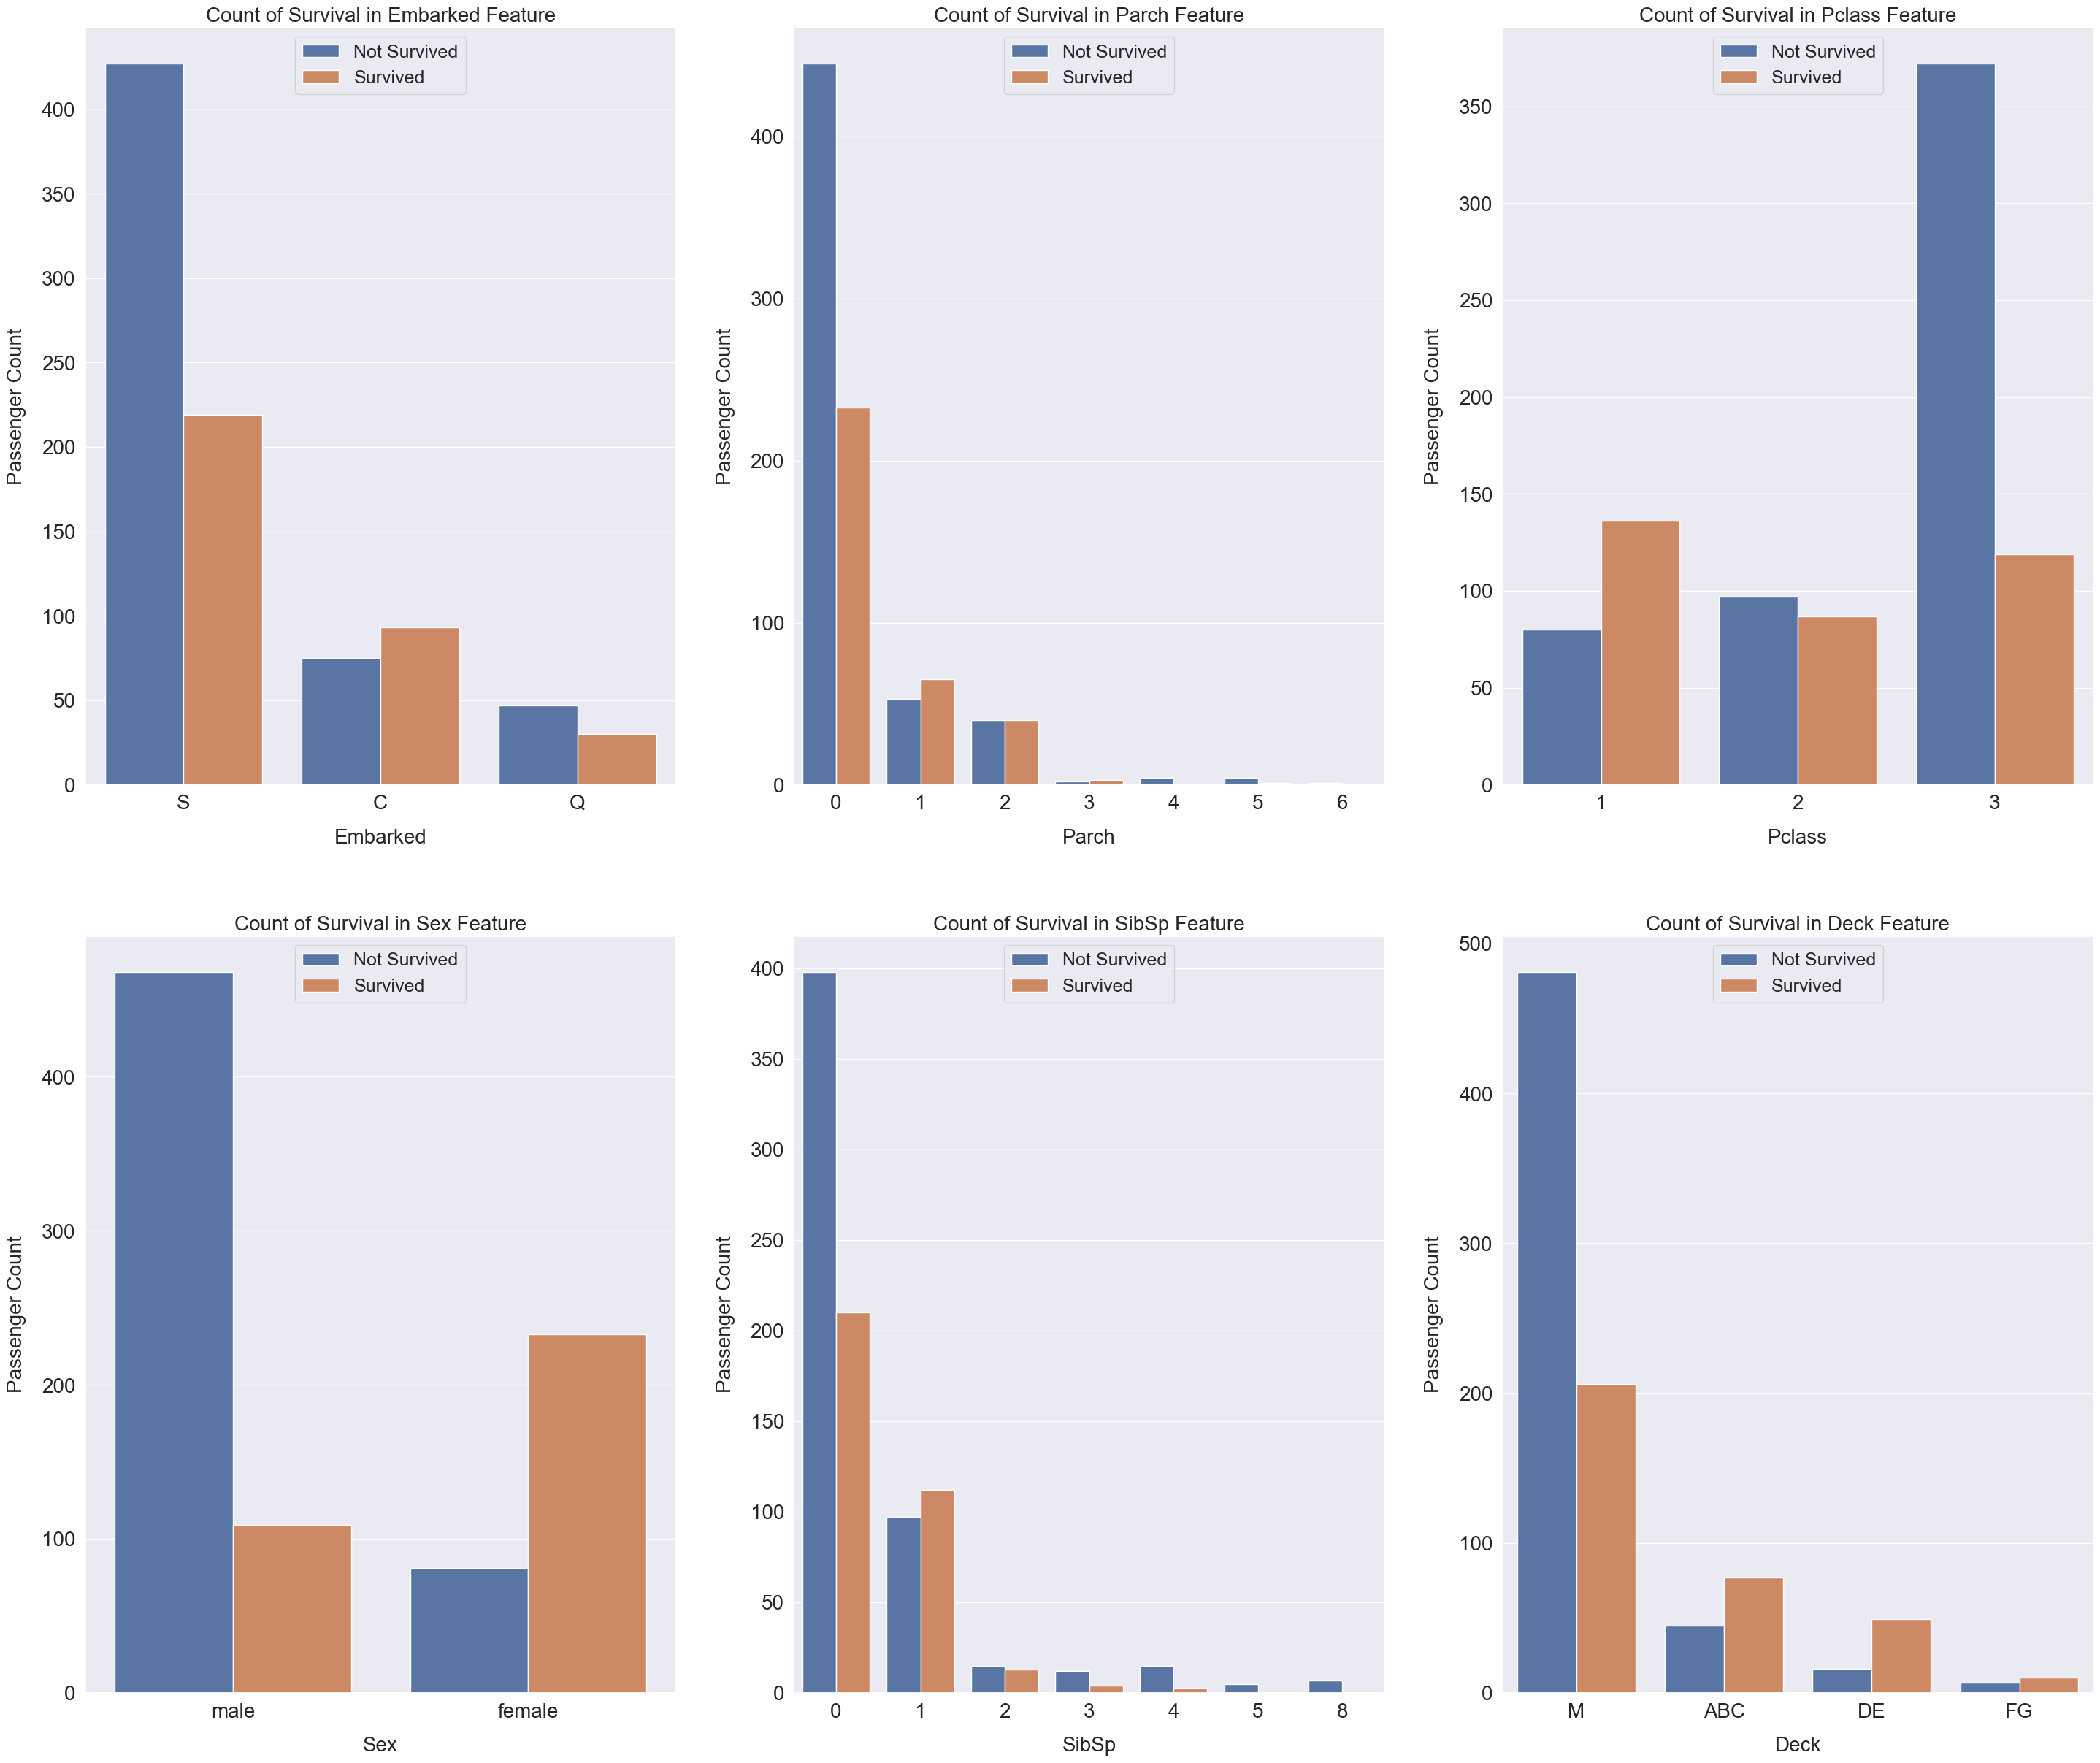

In [32]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (20,20))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2,3,i)
    sns.countplot(x= feature, hue = 'Survived', data = df_train)
    
    plt.xlabel('{}'.format(feature), size = 20, labelpad = 15)
    plt.ylabel('Passenger Count', size = 20, labelpad = 15)
    plt.tick_params(axis= 'x', labelsize = 20)
    plt.tick_params(axis= 'y', labelsize = 20)
    plt.legend(['Not Survived', 'Survived'], loc = 'upper center', prop = {'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size = 20, y = 1.0)

plt.show()

### Insights:
Every categorical has at least one feature with high mortality rate. Those classes are very helpful to pedict whether the passenger is a survivor or victim. **Best categorical features are Pclass and Sex because they have the most homogenous distributions.**
- Passengers boarded from **Southampton** have a lower survival rate unlike other ports. More than half of the passengers boarded from **Cherbourg** had survived.
- 'Parch' and 'SibSp' features show that passengers with only one family member have a higher survival rate.

## CONCLUSION:
- Most of the features are correlated with each other. This relationship can be used to create new features with feature transformation and feature interaction. Target encoding could be very useful as well because of the high correlations with 'Survived' feature.
- Split points and spikes are visible in continuous features. They can be captured easily with a decision tree model, but linear models may not be able to spot them.
- Categorical features have very distinct distributions with different survival rates. Those features can be one-hot encoded. Some of those features may be combined wth each other to make new features.
- Created a new feature called 'Deck' and dropped 'Cabin' feature at the **Exploratory Data Analysis** part.

In [33]:
df_all = concat_df(df_train, df_test)
df_all.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,M,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,M,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,M,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


# FEATURE ENGINEERING
## Binning Continuous Features
### 1. Fare

In [34]:
# qcut: Quantile-based discretization function.
#Discretize variable into equal-sized buckets based on rank or based on 
#sample quantiles.
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

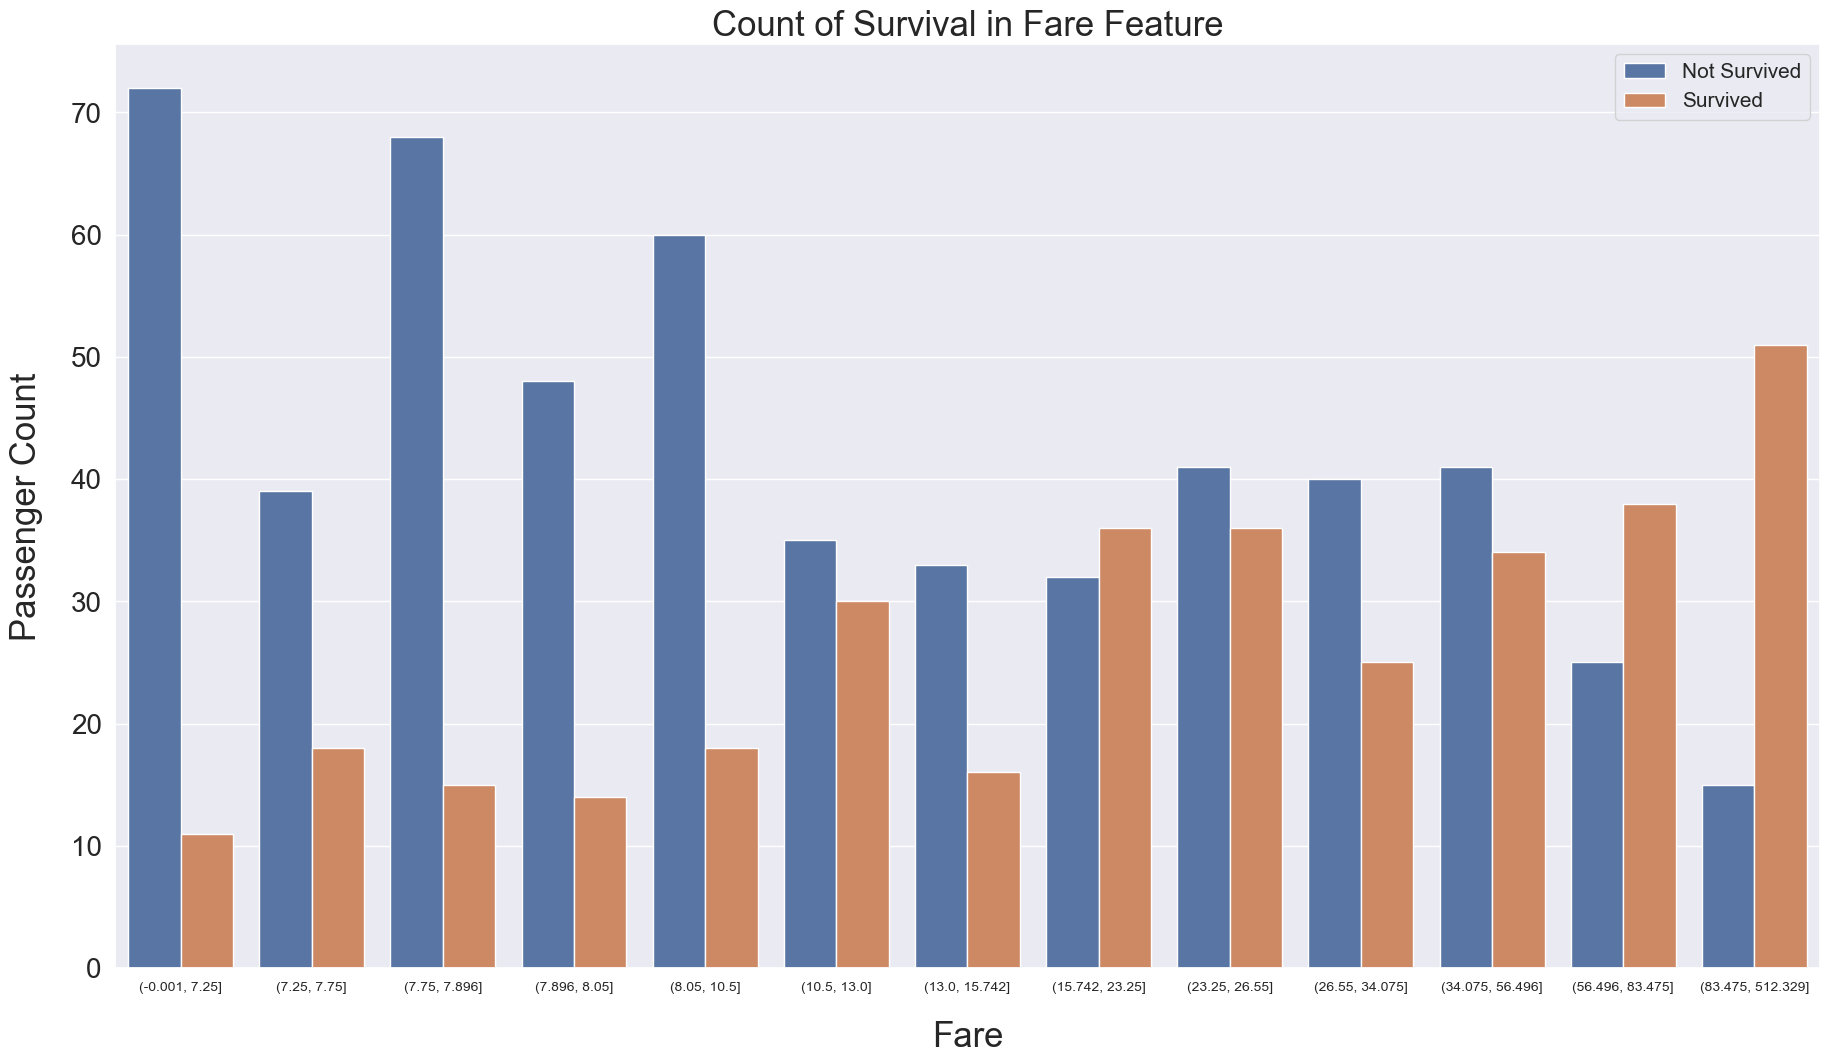

In [35]:
fig, axs = plt.subplots(figsize = (22,12))
sns.countplot(x= 'Fare', hue = 'Survived', data = df_all)
plt.xlabel('Fare', size = 25, labelpad = 20)
plt.ylabel('Passenger Count', size = 25, labelpad = 20)
plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 20)
plt.legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size = 25, y = 1.0)
plt.show()

### Insights:
- 'Fare' feature is positively skewed and survival rate is extremely high on the right end. **13 quantile based bins** are used for Fare feature. Even to the bins are too many, they provide decent amount of information gain.
- The groups at the **left side have the lowest survival rate** and groups at the **right side have highest survival rate.**. This high survival rate was not visible in the distribution graph. 
- There is also an unusual group **(15.742,23.25]** in the middle with high survival rate that is captured in this process.

### 2. Age

In [36]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

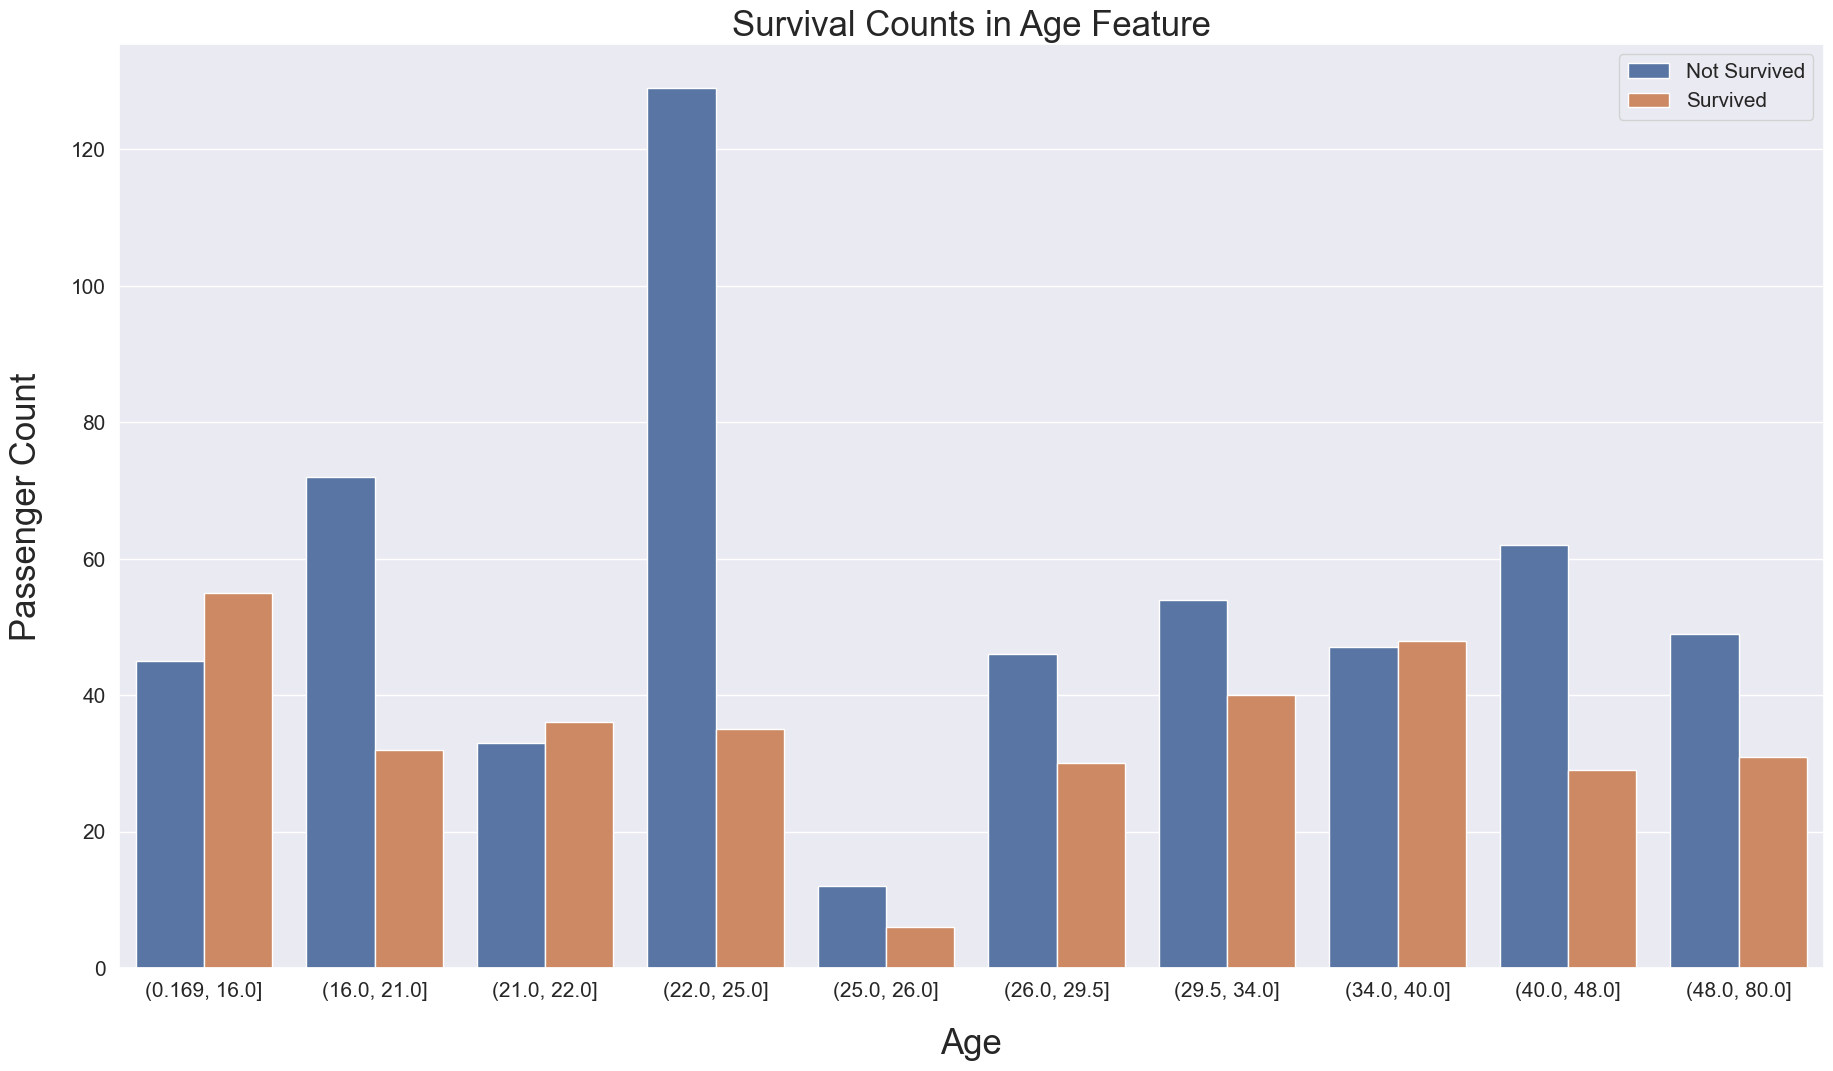

In [37]:
fig, axs = plt.subplots(figsize = (22,12))
sns.countplot(x='Age', hue = 'Survived', data = df_all)
plt.xlabel('Age', size = 25, labelpad = 20)
plt.ylabel('Passenger Count', size = 25, labelpad = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size = 25, y = 1.0)
plt.show()

### Frequency Encoding

### Family Size

In [38]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
df_all['Family_Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

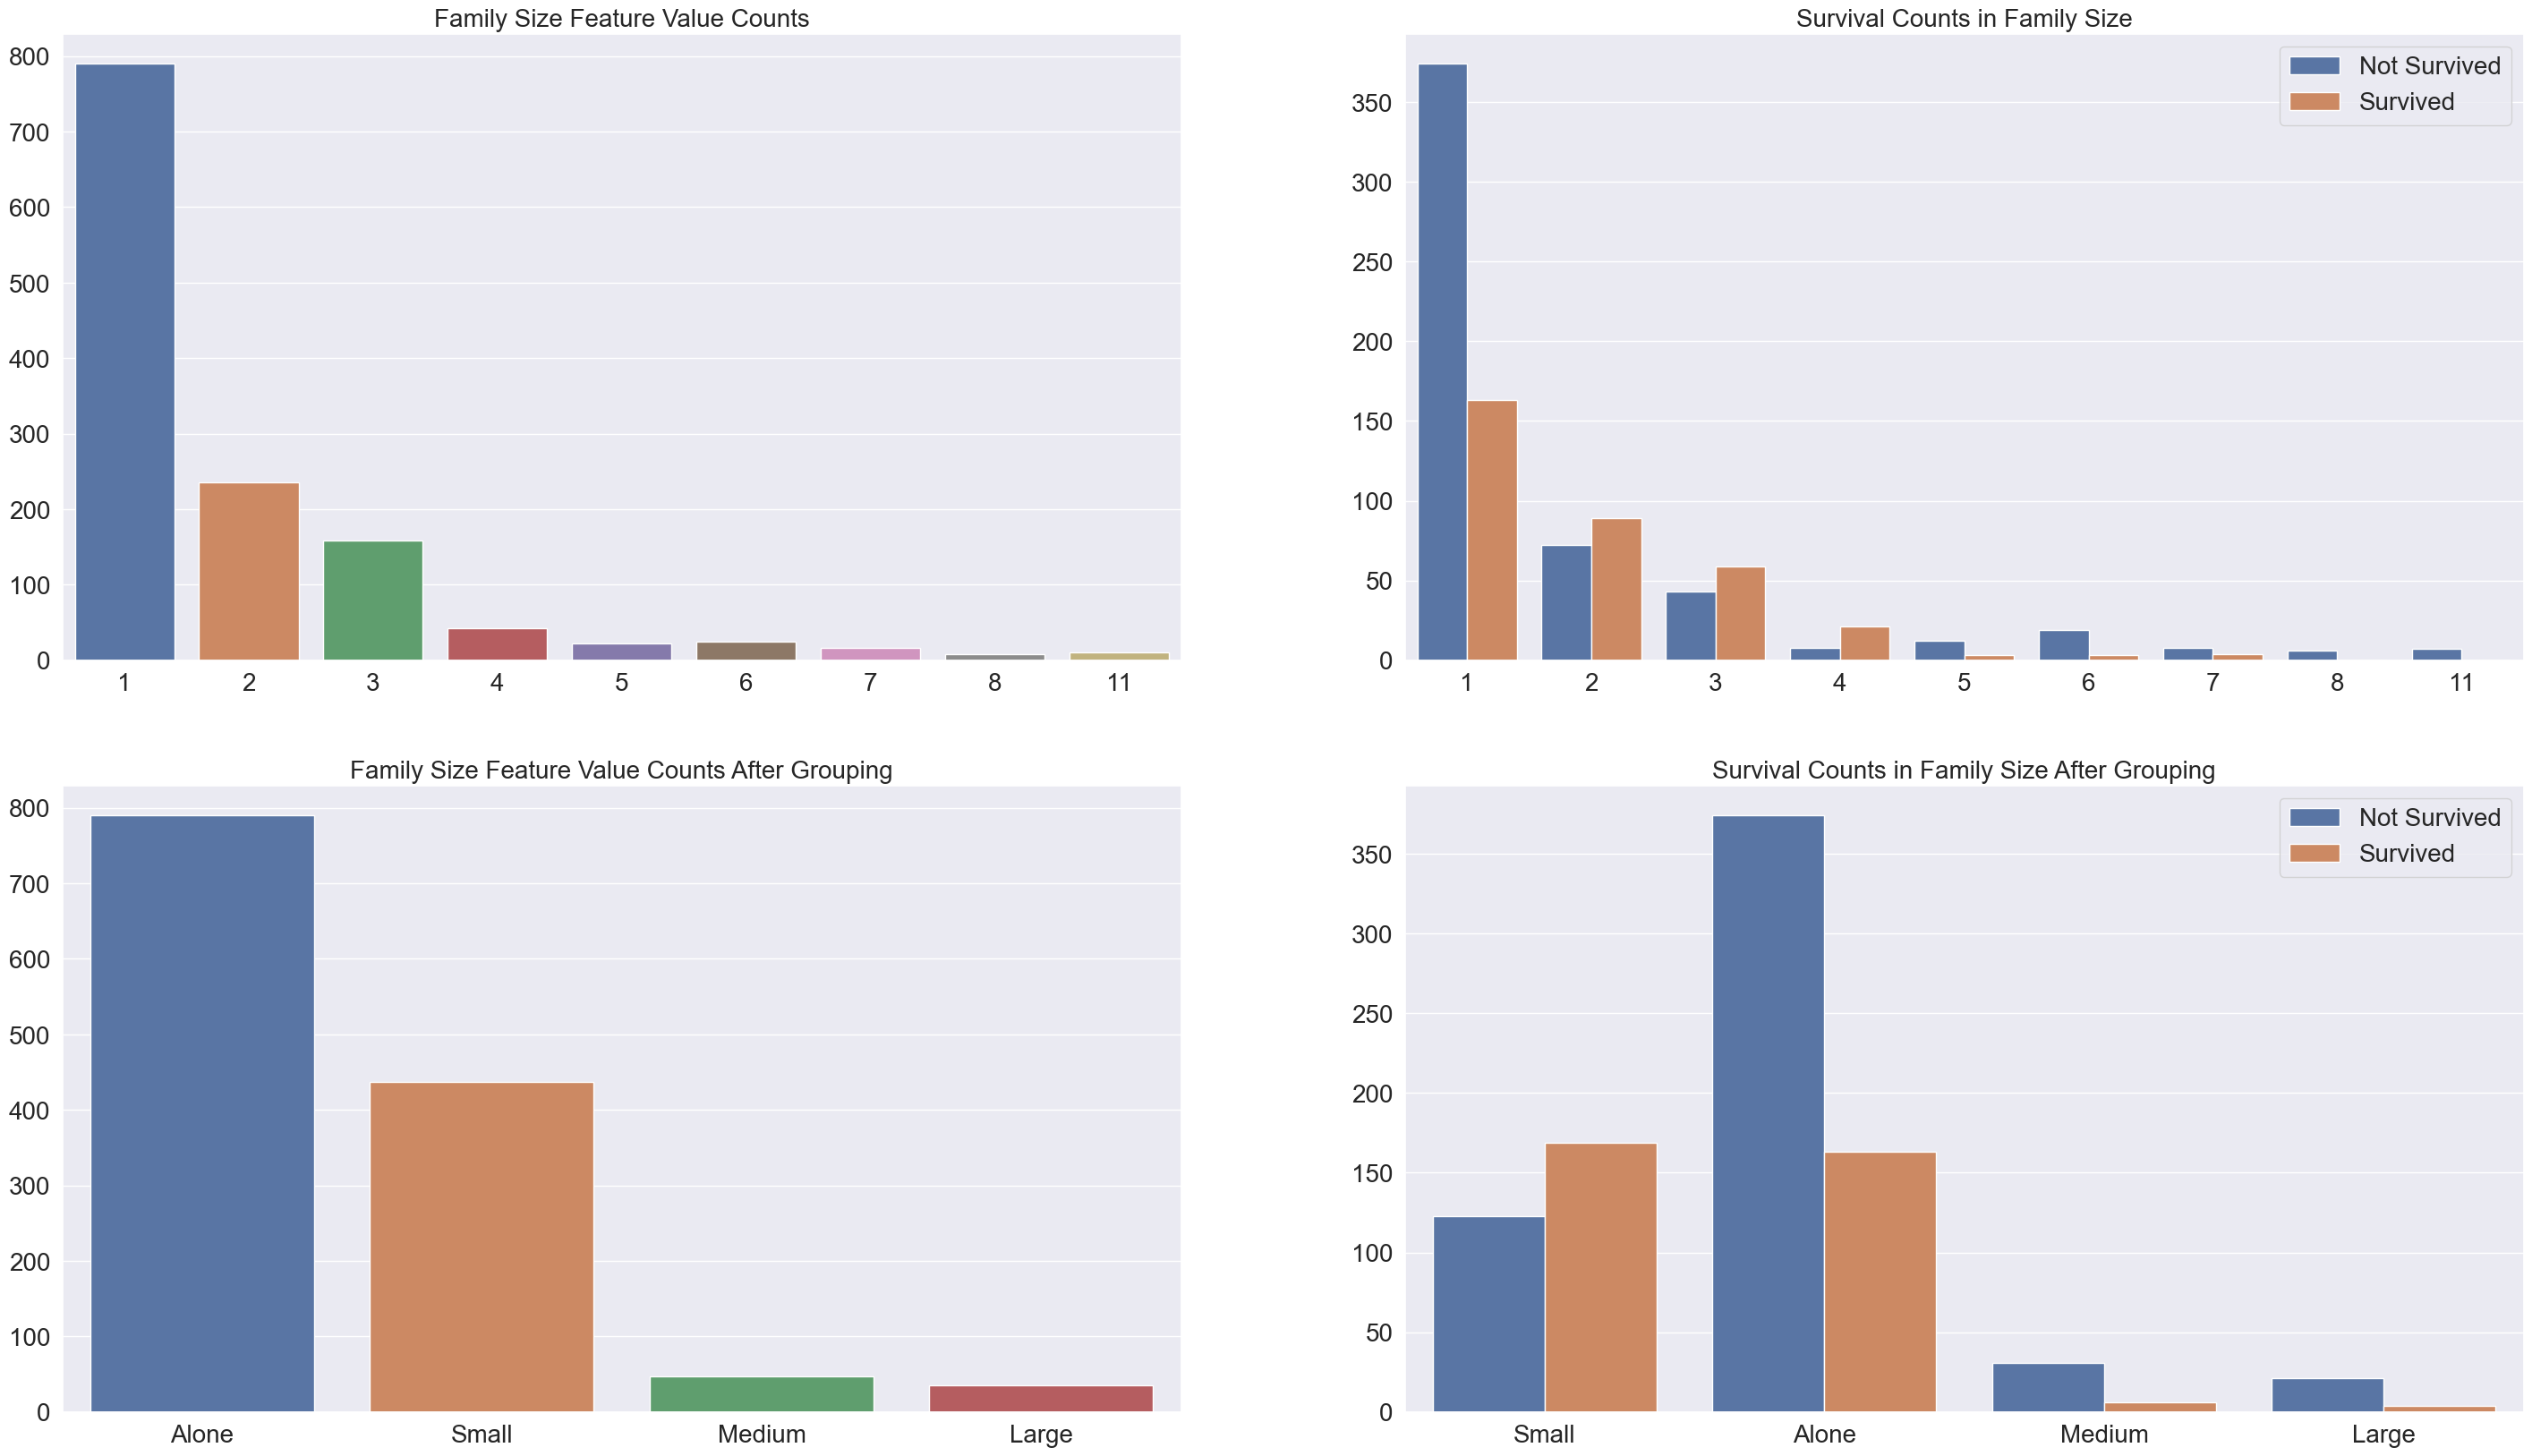

In [39]:
fig, axs = plt.subplots(figsize = (20,20), ncols = 2, nrows = 2)
plt.subplots_adjust(right = 1.5)
sns.barplot(x = df_all['Family_Size'].value_counts().index, y = df_all['Family_Size'].value_counts().values, ax = axs[0][0])
sns.countplot(x= 'Family_Size', hue = 'Survived', data = df_all, ax= axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size  = 20, y= 1.0)
axs[0][1].set_title('Survival Counts in Family Size', size = 20, y = 1.0)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)
sns.barplot(x= df_all['Family_Size_Grouped'].value_counts().index, y = df_all['Family_Size_Grouped'].value_counts().values, ax = axs[1][0])
sns.countplot(x = 'Family_Size_Grouped', hue = 'Survived', data = df_all, ax = axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size = 20, y = 1.0)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size = 20, y = 1.0)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis ='x', labelsize = 20)
        axs[i][j].tick_params(axis ='y', labelsize = 20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.show()

### Insights:
- 'Family_Size' is created by adding 'SibSp', 'Parch' and 1. 'SibSp' is the count of siblings and spouse, and 'Parch' is the count of parents and children. Those columns are added in order to find the total size of families. Adding 1 at the end, is the current passenger. 
- Graphs have clearly shown that family size is a predictor of survival because different values have different survival rates.
- Family Size with 1 are labeled as Alone
- Family Size with 2, 3 and 4 are labeled as Small
- Family Size with 5 and 6 are labeled as Medium
- Family Size with 7, 8 and 11 are labeled as Large

### Ticket
- There are too many unique Ticket values to analyze, so grouping them up by their frequencies makes things easier.

- **How is this feature different than Family_Size?** Many passengers travelled along with groups. Those groups consist of friends, nannies, maids and etc. They weren't counted as family, but they used the same ticket.

- **Why not grouping tickets by their prefixes?** If prefixes in Ticket feature has any meaning, then they are already captured in Pclass or Embarked features because that could be the only logical information which can be derived from the Ticket feature.

In [40]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

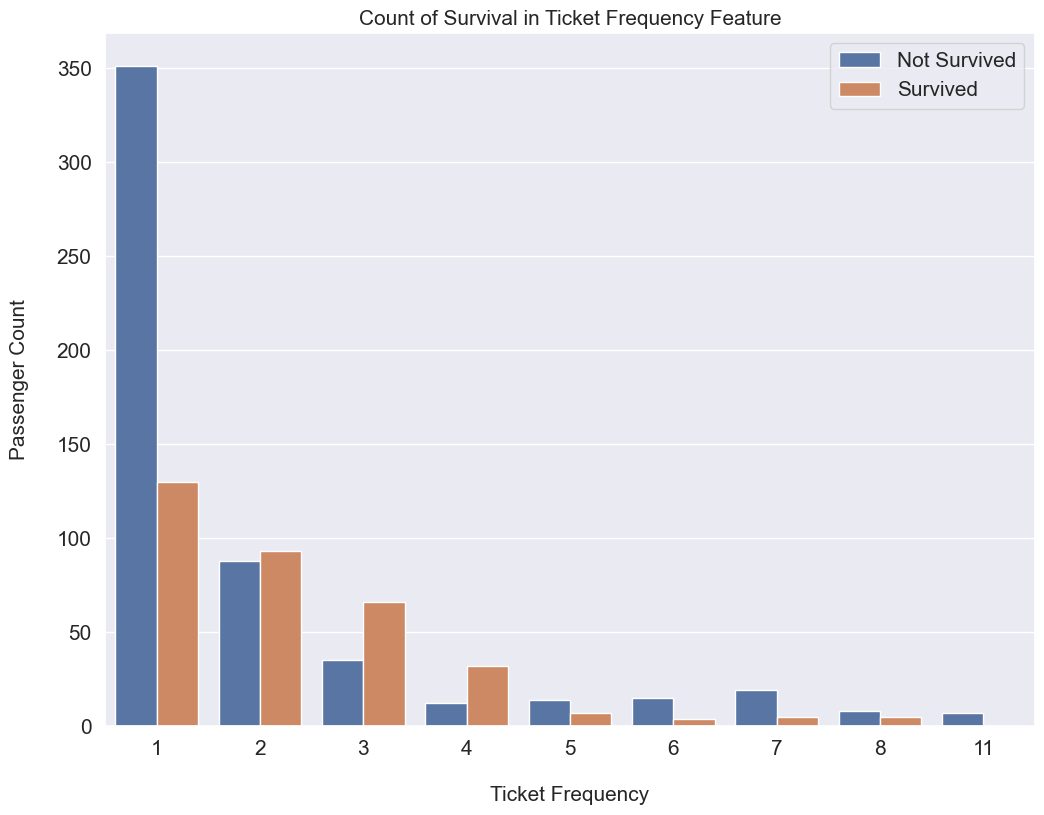

In [41]:
fig, axs = plt.subplots(figsize = (12, 9))
sns.countplot(x = df_all['Ticket_Frequency'], hue = df_all['Survived'])
plt.xlabel('Ticket Frequency', size = 15, labelpad = 20)
plt.ylabel('Passenger Count', size = 15, labelpad = 20)
plt.tick_params(axis = 'x', labelsize = 15)
plt.tick_params(axis = 'y', labelsize = 15)
plt.legend(['Not Survived', 'Survived'], loc = 'upper right', prop = {'size': 15})
plt.title('Count of Survival in Ticket Frequency Feature', size = 15, y= 1.0)
plt.show()

### Insights:
- According to graph above, Ticket Frequency groups with **2, 3 and 4** members have a high survival rate. After 4 group members, survial rate decreases drastically.
- The pattern is very similar to Family_Size but there are minor differences. RTicket_Frequency values are not grouped like Family_size because that would basically create the same feature with perfect correlation. That kind of feature wouldn't provide any additional information gain.

### Title & Is Married 

In [42]:
df_all['Title'] = df_all['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0]
df_all['Is_Married'] = 0
df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] =1
df_all['Title'] = df_all['Title'].str.strip()
df_all['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

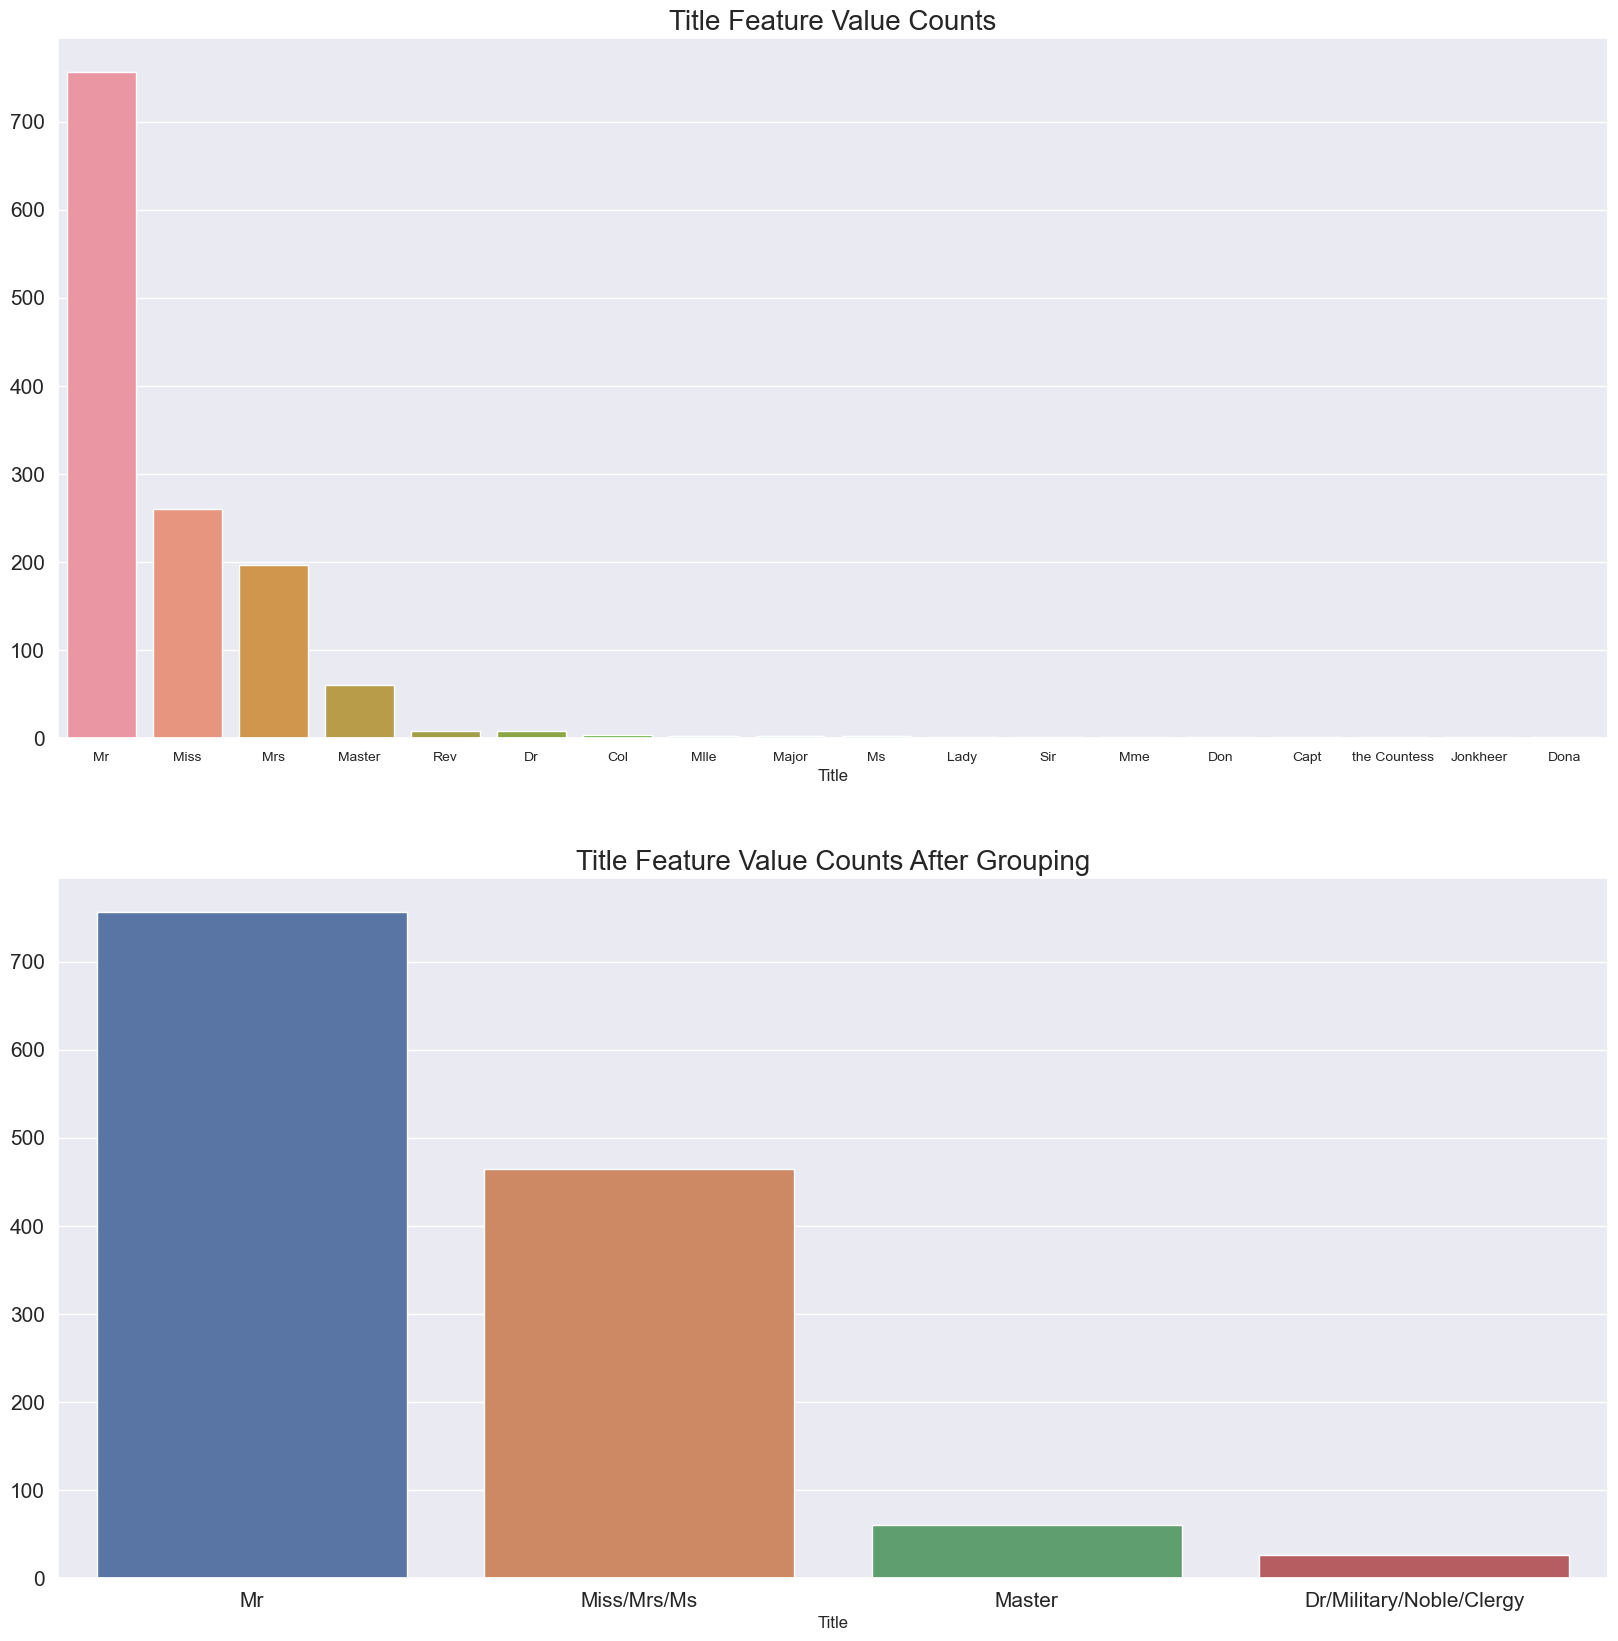

In [43]:
fig, axs = plt.subplots(nrows = 2, figsize = (20,20))
sns.barplot(x = df_all['Title'].value_counts().index, y = df_all['Title'].value_counts().values, ax = axs[0])
axs[0].tick_params(axis = 'x', labelsize = 10)
axs[1].tick_params(axis = 'x', labelsize = 15)

for i in range(2):
    axs[i].tick_params(axis = 'y', labelsize = 15)
    
axs[0].set_title('Title Feature Value Counts', size = 20, y = 1.0)
df_all['Title'] = df_all['Title'].replace(['Mrs', 'Miss', 'Mme',
       'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Capt', 'Rev', 'Major', 'Col',
                    'Sir', 'Don', 'Jonkheer'], 'Dr/Military/Noble/Clergy')
sns.barplot(x= df_all['Title'].value_counts().index, y = df_all['Title'].value_counts().values, ax = axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size = 20, y = 1.0)

plt.show()

### Insights:
- 'Title' is created by extracting the prefix before Name feature. According to graphs above, there are many titles that are occuring very few times. Some of them do not seem correct and needed to be replaced.
- **'Mrs', 'Miss', 'Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'** titles are replaced with **'Miss/Mrs/Ms'** because all of them are referring to female passengers. Values like Mlle, Mme and Dona are actually name of passengers but they are classifies as titles because Name feature is split by comma.
- **'Dr', 'Capt', 'Rev', 'Major', 'Col', 'Sir', 'Don', 'Jonkheer'** are replaced by **'Dr/Military/Noble/Clergy'** because those passengers have similar characteristics. 
- **'Master'** is a unique title. It is given to male passengers below age 26. They have the highest survival rate among all males.
- **'Is_Married'** is a binary feature based on the Mrs. title. Mrs. title has the highest survival rate among other female titles. **This title needs to be a feature because all female titles are grouped with each other.**

## Target Encoding

- 'extract_surname' function is used for extracting the surnames of passengers from the 'Name' feature. 'Family' feature is created with the extracted Surname. This is necessary for grouping passengers in the same family.

In [44]:
def extract_surname(data):
    families = []
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            family = family.replace(c, '').strip()
        
        families.append(family)
    return families

df_all['Family'] = extract_surname(df_all['Name'])
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

In [45]:
#Creating a list of families and tickets that are occuring in both training and
#testing set
non_unique_families = [x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets = [x for x in df_train['Ticket'].unique() if x in df_test['Ticket'].unique()]

df_family_survival_rate = df_train.groupby('Family')[['Survived', 'Family_Size']].median()
df_ticket_survival_rate = df_train.groupby('Ticket')[['Survived', 'Ticket_Frequency']].median()

family_rates = {}
ticket_rates = {}

for i in range(len(df_family_survival_rate)):
    #Checking a family exists in both training and test set, and has members more than 1
    if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i, 1] > 1:
        family_rates[df_family_survival_rate.index[i]] = df_family_survival_rate.iloc[i, 0]
        
for i in range(len(df_ticket_survival_rate)):
    #Checking a ticket exists in both training and test set, and has members more than 1
    if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i, 1] > 1:
        ticket_rates[df_ticket_survival_rate.index[i]] = df_ticket_survival_rate.iloc[i, 0]


In [46]:
df_train.groupby('Family')[['Survived', 'Family_Size']].median()

,Survived,Family_Size
Family,,
Abbing,0.0,1.0
Abbott,0.5,3.0
Abelson,0.5,2.0
Adahl,0.0,1.0
Adams,0.0,1.0
...,...,...
de Mulder,1.0,1.0
de Pelsmaeker,0.0,1.0
del Carlo,0.0,2.0


In [47]:
mean_survival_rate = np.mean(df_train['Survived'])

train_family_survival_rate = []
train_family_survival_rate_NA = []
test_family_survival_rate = []
test_family_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Family'][i] in family_rates:
        train_family_survival_rate.append(family_rates[df_train['Family'][i]])
        train_family_survival_rate_NA.append(1)
    else:
        train_family_survival_rate.append(mean_survival_rate)
        train_family_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Family'].iloc[i] in family_rates:
        test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
        test_family_survival_rate_NA.append(1)
    else:
        test_family_survival_rate.append(mean_survival_rate)
        test_family_survival_rate_NA.append(0)
        
df_train['Family_Survival_Rate']= train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate']= test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
    if df_train['Ticket'][i] in ticket_rates:
        train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
        train_ticket_survival_rate_NA.append(1)
    else:
        train_ticket_survival_rate.append(mean_survival_rate)
        train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
    if df_test['Ticket'].iloc[i] in ticket_rates:
        test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
        test_ticket_survival_rate_NA.append(1)
    else:
        test_ticket_survival_rate.append(mean_survival_rate)
        test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate']= train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate']= test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA


In [48]:
for df in [df_train, df_test]:
    df['Survival_Rate'] = (df['Ticket_Survival_Rate'] + df['Family_Survival_Rate'])/2
    df['Survival_Rate_NA'] = (df['Ticket_Survival_Rate_NA'] + df['Family_Survival_Rate_NA'])/2

### Code Explanation for what we have done above:
- **'Family_Survival_Rate'** is calculated from families in training set since there is no 'Survived' feature in testing set. A list of families that are occuring in both training and testing set ('non_unique_families'), is created.
- The **survival rate** is calculated for families with more than 1 members in that list and stored in 'Family_Survival_Rate' feature.
- An extra binary feature **'Family_Survival_Rate_NA** is created for families that are unique to the testing or training set. This feature is necessary since there is no way to calculate those families' survival rate. This feature (when = 0) implies that family survival rate is not applicable to those passengers because there is no way to retrieve their survival rate. The **'Family_Survival_Rate'** for these familes is filled with the **mean_survival_rate.**
- **'Ticket_Survival_Rate'** and **'Ticket_Survival_Rate_NA** features are also created with the same method. 
- **'Family_Survival_Rate'** and **'Ticket_Survival_Rate'** are averaged to become **'Survival_Rate'**.
- **'Family_Survival_Rate_NA'** and **'Ticket_Survival_Rate_NA'** are averaged to become **'Survival_Rate_NA'**.

## Feature Transformation
### Label Encoding Non-Numerical Features

In [49]:
non_numeric_features = ['Embarked', 'Sex', 'Deck', 'Title', 'Fare', 
                        'Family_Size_Grouped', 'Age']
for df in dfs:
    for feature in non_numeric_features:
        df[feature] = LabelEncoder().fit_transform(df[feature])

- The categorical features **'Embarked', 'Sex', 'Deck', 'Title' and 'Family_Size_Grouped'** are object type and **'Age', 'Fare'** are category type. They are converted to numerical type with **LabelEncoder().**
- LabelEncoder basically labels the classes from 0 to n. This process is necessary for models to learn from those features.

### One-Hot Encoding The Categorical Features

In [50]:
cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1,1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature,n) for n in range(1, n+1)]
        encoded_df = pd.DataFrame(encoded_feat, columns = cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis = 1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis = 1)

- The categorical features **('Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped')** are converted to one-hot encoded features with **OneHotEncoder()**. **'Age' and 'Fare'** features are not converted because they are ordinal unlike the previous ones.

In [51]:
pd.set_option('display.max_columns', None)
df_train.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,2,3,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,3,1,3,0,Braund,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,7,0,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,2,3,2,2,0,Cumings,1.000000,1,1.000000,1,1.000000,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,3,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,1,0,1,2,0,Heikkinen,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,7,0,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,2,3,2,2,0,Futrelle,0.383838,0,0.383838,0,0.383838,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,7,3,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,1,0,1,3,0,Allen,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [52]:
df_test.head()

,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
891,7,3,1,2,"Kelly, Mr. James",0,892,3,1,0,NaN,330911,1,0,1,3,0,Kelly,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
892,8,3,2,0,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,NaN,363272,2,3,1,2,0,Wilkes,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
893,9,3,1,4,"Myles, Mr. Thomas Francis",0,894,2,1,0,NaN,240276,1,0,1,3,0,Myles,0.383838,0,0.383838,0,0.383838,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
894,5,3,2,4,"Wirz, Mr. Albert",0,895,3,1,0,NaN,315154,1,0,1,3,0,Wirz,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
895,2,3,2,5,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,NaN,3101298,3,3,2,2,0,Hirvonen,1.000000,1,1.000000,1,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [53]:
df_all = concat_df(df_train, df_test)
drop_cols= ['Deck', 'Embarked', 'Family', 'Family_Size', 'Family_Size_Grouped',
             'Survived', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 
             'SibSp', 'Ticket', 'Title', 'Ticket_Survival_Rate', 
             'Ticket_Survival_Rate_NA', 'Family_Survival_Rate', 
             'Family_Survival_Rate_NA']

df_all.drop(columns = drop_cols, inplace = True)
df_all

,Age,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Is_Married,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survival_Rate,Survival_Rate_NA,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,0,1.0,0.0,0.0,1.0,0.0,1.000000,1.0,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,0.0,0.0,1.0,1.0,0.0,0.383838,0.0,1,0.0,0.0,1.0,0.0
3,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10,0,1.0,0.0,0.0,1.0,0.0,0.383838,0.0,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1305,7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12,0,1.0,0.0,0.0,1.0,0.0,0.441919,0.5,3,0.0,0.0,1.0,0.0
1306,7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0
1307,3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,0.0,0.0,1.0,0.0,1.0,0.383838,0.0,1,0.0,0.0,0.0,1.0


## CONCLUSION:
- **"Age' and 'Fare' features are binned.** Binning heled dealing with outliers and it revealed some homogenous groups in those features. 
- **Family_Size** is created by adding by adding **'Parch' and 'SibSp' and 1.**
- **Ticket_Frequency** is created by counting the occurence of Ticket values.
- **'Name'** feature is very useful. First, **'Title' and 'Is_Married'** features are created from the title prefix in the names. Second, **'Family_Survival_Rate' and 'Family_Survival_Rate_NA'** features are created by target encoding the surname of the passengers. **'Ticket_Survival_Rate'** is created by target encoding the Ticket feature. **'Survival_Rate'** feature is created by averaging the Family_Survival_Rate and Ticket_Survival_Rate features.
- Finally, **the non-numeric type features are label encoded and categorical features are one-hot encoded.** Created 5 new features (Family_Size, Title, Is_Married, Survival_Rate and Survival_Rate_NA) and dropped the useless features after encoding.

# MODEL.

In [54]:
X_train = StandardScaler().fit_transform(df_train.drop(columns = drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns = drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 26)
y_train shape: (891,)
X_test shape: (418, 26)


## Random Forest


In [55]:
fit_rf = RandomForestClassifier(random_state = SEED)

### Hyper-Parameter Optimization using GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
param_dict = {'max_depth': [4,5,6,7,8], 'criterion': ['gini', 'entropy'], 
              'bootstrap': [True, False], 'min_samples_split': [4,5,6], 
              'max_features': ['log2', 'sqrt', None]}

cv_rf = GridSearchCV(fit_rf, param_grid = param_dict, cv = 10, n_jobs = 3)
cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 4}


In [66]:
fit_rf.set_params(bootstrap= True, criterion= 'gini', min_samples_split = 4, 
                  max_depth= 6, max_features= 'log2')

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_split=4,
                       n_estimators=600, oob_score=True, random_state=42,
                       warm_start=True)

### OOB Score

In [68]:
fit_rf.set_params(warm_start = True, oob_score = True)
min_estimators = 1000
max_estimators = 2000
error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators = i)
    fit_rf.fit(X_train, y_train)
    error_rate[i] = 1- fit_rf.oob_score_
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate across various Forest sizes \n From 1000 to 2000')

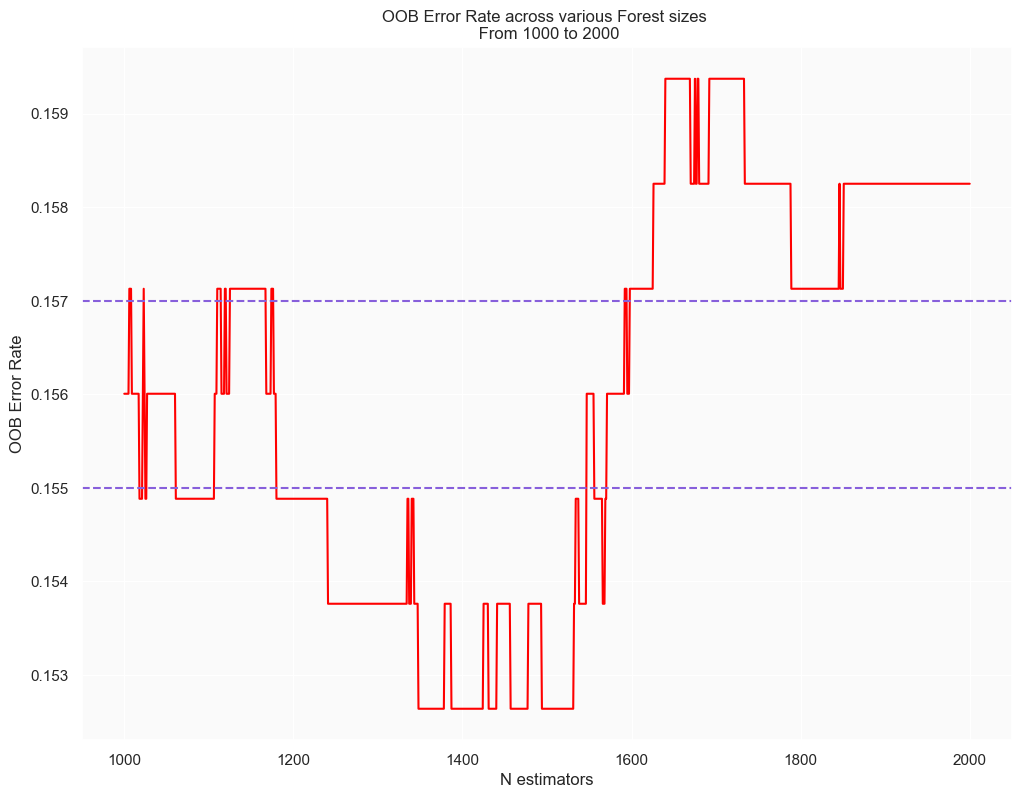

In [70]:
fig, ax = plt.subplots(figsize = (12,9))
ax.set_facecolor('#fafafa')
oob_series.plot(kind = 'line', color = 'red')
plt.axhline(0.155, color = '#875FDB', linestyle = '--')
plt.axhline(0.157, color = '#875FDB', linestyle = '--')
plt.xlabel('N estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate across various Forest sizes \n From 1000 to 2000')

In [75]:
print('OOB Error Rate for 1050 trees is: {0: .5f}'.format(oob_series[1050]))

OOB Error Rate for 1050 trees is:  0.15600


In [76]:
#Refine the tree via OOB output
fit_rf.set_params(n_estimators = 1050, bootstrap = True, 
                  warm_start = False, oob_score = False)

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_split=4,
                       n_estimators=1050, random_state=42)

In [77]:
#Training Ml model
fit_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_split=4,
                       n_estimators=1050, random_state=42)

### Variable Importance

In [78]:
def variable_importance(fit):
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit))
        
        # Captures whether the model has been trained
        if not vars(fit)['estimators_']:
            return print('Model does not appear to be trained.')
    except KeyError:
        print('Model entered does not contain ''estimators_'' attribute.')
        
    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances, 'index': indices}

In [79]:
var_imp_rf = variable_importance(fit_rf)
importances_rf = var_imp_rf['importance']
indices_rf = var_imp_rf['index']

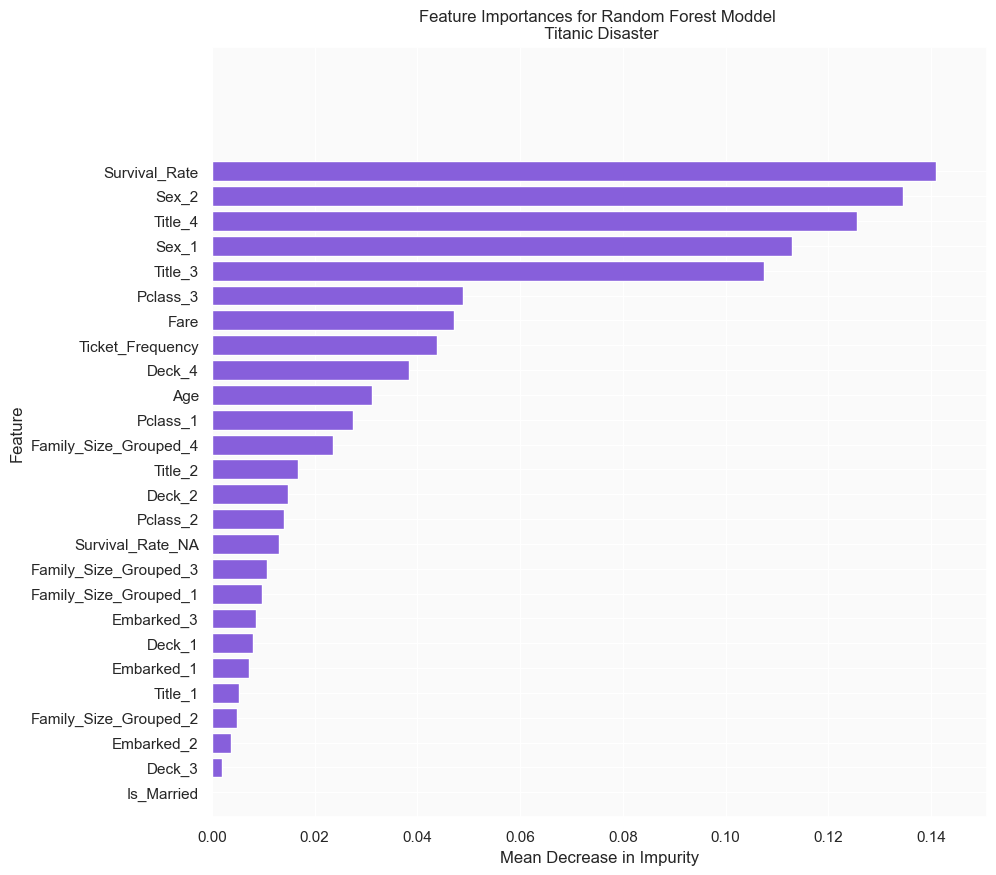

In [86]:
def variable_importance_plot(importances, indices, name_index):
    index = np.arange(len(name_index))
    importance_desc = sorted(importances)
    feature_space = []
    for i in range(indices.shape[0] -1, -1, -1):
        feature_space.append(name_index[indices[i]])
        
    fig, ax = plt.subplots(figsize = (10,10))
    
    ax.set_facecolor('#fafafa')
    #ax.bar_label(ax.containers)
    plt.title('Feature Importances for Random Forest Moddel \n Titanic Disaster')
    plt.barh(index, importance_desc, align = 'center', color = '#875FDB')
    plt.yticks(index, feature_space)
    plt.ylim(-1,30)
    plt.xlim(0,max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')
    
    plt.show()
    plt.close()
    
names_index = ['Age', 'Fare', 'Ticket_Frequency', 'Is_Married', 'Survival_Rate',
       'Survival_Rate_NA', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1',
       'Sex_2', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Embarked_1',
       'Embarked_2', 'Embarked_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4']
variable_importance_plot(importances_rf, indices_rf, names_index)

In [83]:
a = df_train.drop(columns = drop_cols)
a.columns

Index(['Age', 'Fare', 'Ticket_Frequency', 'Is_Married', 'Survival_Rate',
       'Survival_Rate_NA', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1',
       'Sex_2', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Embarked_1',
       'Embarked_2', 'Embarked_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4'],
      dtype='object')